# Data preparation

In [428]:
# import parselmouth
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import statsmodels.graphics.api as smg
import sys

# import shutil  # copy files
from os import path

from scipy.stats.stats import pearsonr

In [ ]:
# to show numpy array to the full 
import sys
np.set_printoptions(threshold=sys.maxsize)

## Processing .wav files

In [224]:
# read .wav files and make mono .wav files 
def read_wav(wav_file):
    print("processing {}...".format(wav_file))
    snd = parselmouth.Sound(wav_file)
    
    # extract channels
    if len(snd.extract_all_channels()) == 2:
        snd_A = snd.extract_all_channels()[0]
        snd_B = snd.extract_all_channels()[1]
        
        # save wave files       
        snd_A.save(os.path.splitext(wav_file)[0] + "A.wav", 'WAV')
        snd_B.save(os.path.splitext(wav_file)[0] + "B.wav", 'WAV')

In [ ]:
# run once? extract 2-channel .wav files
for wav_file in glob.glob("../data/*.wav"):
#snd_A, snd_B, path_A, path_B = read_wav("../data/sw2005.wav")
    read_wav(wav_file)

In [243]:
# remove precessed 2-channel .wav files
for f in glob.glob("../data/sw????.wav"):
    os.remove(f)

In [118]:
# del

# copy transcripts to the working dir
wav_paths = glob.glob("../data/*.wav")
names = []
for p in wav_paths:
    names.append(p[10:15])
print(names)
names = sorted(names)
print(names)
print(len(names))

# delete an assigned variable
del path
del wav_paths
del names

import shutil
from os import path

trans_path_list =[]
for i in range(len(names)):
    trans_path = glob.glob("../switchboard_word_alignments/swb_ms98_transcriptions/*/*/sw"+names[i] + "-ms98-a-word.text")
    if len(trans_path) != 0:
        trans_path_list.append(trans_path[0])
print(trans_path_list)
print(len(trans_path_list))

# copy transcript files to wave file dir 
for tp in trans_path_list:
    if path.exists(tp):
        # path of source file
        src = path.realpath(tp)
        # head = path, tail = file name
        head, tail= path.split(src)
        # path of destinition
        dst = "../data/" + tail
        print(dst)
        shutil.copy(src, dst)

['2191B', '4531A', '2191A', '4531B', '2450A', '3083A', '2348B', '4320B', '3324B', '2450B', '3083B', '2348A', '4320A', '3324A', '2565B', '3817A', '3817B', '2565A', '2636A', '3601B', '4721A', '2636B', '3601A', '4721B', '3301A', '2005A', '3301B', '2005B', '3044B', '2710B', '4021A', '3044A', '2710A', '4021B', '2222A', '3203B', '4010B', '2886B', '2222B', '3203A', '4010A', '2886A', '4400A', '4400B']
['2005A', '2005B', '2191A', '2191B', '2222A', '2222B', '2348A', '2348B', '2450A', '2450B', '2565A', '2565B', '2636A', '2636B', '2710A', '2710B', '2886A', '2886B', '3044A', '3044B', '3083A', '3083B', '3203A', '3203B', '3301A', '3301B', '3324A', '3324B', '3601A', '3601B', '3817A', '3817B', '4010A', '4010B', '4021A', '4021B', '4320A', '4320B', '4400A', '4400B', '4531A', '4531B', '4721A', '4721B']
44


## Generating Praat .TextGrid files

In [260]:
# read transcription files and add headers
def read_trans(trans_path):
    trans = pd.read_csv(trans_path, sep= "\s+", header=None)
    
    # for ptree_word_alignments
    #trans.columns = ["ms_id", "ldc_id", "start_time", "end_time", "tag", "ldc_trans", "ms_trans"]
    
    # for swb_ms98_transcriptions
    trans.columns = ["ms_id", "start_time", "end_time", "ms_trans"]
    
    # drop rows which have the same start time
    trans = trans.drop_duplicates(subset="end_time")
    
    # however index cannot be reset, so convert df to nparray
    trans = trans.to_numpy()
    
    # endtime cannot be 0 in case of error in creating .textgrid
    trans = np.delete(trans, np.where(trans[:, 2]==0)[0], axis=0)
    
    return trans

In [259]:
trans = pd.read_csv("/Users/the-imitation-gamer/Documents/SLP/Msc_Dissertation/data/sw3301A-ms98-a-word.text", sep= "\s+", header=None)
trans.columns = ["ms_id", "start_time", "end_time", "ms_trans"]
trans = trans.drop_duplicates(subset="end_time")
trans = trans.to_numpy()
print(len(trans))

# end time in 1st row cannot be 0
trans = np.delete(trans, np.where(trans[:, 2]==0)[0], axis=0)
print(len(trans))
print(trans)

840
839
[['sw3301A-ms98-a-0001' 0.0 0.011375 '[noise]']
 ['sw3301A-ms98-a-0001' 0.011375 0.061625 'feel']
 ['sw3301A-ms98-a-0001' 0.061625 0.42 'about']
 ['sw3301A-ms98-a-0001' 0.42 0.76 'um']
 ['sw3301A-ms98-a-0001' 0.76 0.82 'the']
 ['sw3301A-ms98-a-0001' 0.82 1.09 'Russian']
 ['sw3301A-ms98-a-0001' 1.09 1.63 'situation']
 ['sw3301A-ms98-a-0001' 1.63 1.78 'right']
 ['sw3301A-ms98-a-0001' 1.78 2.04425 'now']
 ['sw3301A-ms98-a-0001' 2.04425 2.797625 '[silence]']
 ['sw3301A-ms98-a-0002' 2.797625 13.66025 '[silence]']
 ['sw3301A-ms98-a-0003' 13.66025 14.20275 '[silence]']
 ['sw3301A-ms98-a-0003' 14.20275 14.642 'um-hum']
 ['sw3301A-ms98-a-0003' 14.642 15.036375 '[silence]']
 ['sw3301A-ms98-a-0004' 15.036375 18.88175 '[silence]']
 ['sw3301A-ms98-a-0005' 18.88175 19.39175 '[silence]']
 ['sw3301A-ms98-a-0005' 19.39175 19.57275 'um']
 ['sw3301A-ms98-a-0005' 19.57275 19.712875 'it']
 ['sw3301A-ms98-a-0005' 19.712875 19.87175 'is']
 ['sw3301A-ms98-a-0005' 19.87175 20.17175 'very']
 ['sw3301A-m

In [ ]:
# get path list and trans list
trans_paths = sorted(glob.glob("../data/*.text"))
print(trans_paths)
sound_paths = sorted(glob.glob("../data/*.wav"))
print(sound_paths)

for i in range(len(sound_paths)):
    print(trans_paths[i], sound_paths[i])

In [261]:
# function to create a TextGrid 
def text_grid(sound, trans):
    snd = parselmouth.Sound(sound)
    tg = parselmouth.praat.call(snd, "To TextGrid", "word", "")
    
    trans = read_trans(trans)
    
    # call.() or parselmouth.praat.call()?
    # timeit df.index < df.shape < df.[0].count()
    for i in range(len(trans)):
        if i < len(trans)-1:
            # one time point can only insert one boundary, need to delete rows with same time points
            # parselmouth.praat.call(tg, "Insert boundary", 1, trans.start_time[i+1])
            parselmouth.praat.call(tg, "Insert boundary", 1, trans[i, 2])
            parselmouth.praat.call(tg, "Set interval text", 1, i+1, trans[i, 3])
        else:
            parselmouth.praat.call(tg, "Set interval text", 1, i+1, trans[i, 3])
        
    tg.save(os.path.splitext(sound)[0] + ".TextGrid")

In [262]:
# create .TextGrid files
for i in range(len(sound_paths)):
    text_grid(sound_paths[i], trans_paths[i]) 

# Feature extraction

## ProsodyPro

## Feature list

1. continuous f0 velocity: (= first derivative of f0) curves (for labeled intervals only)

2. sampled f0: f0 at fixed time intervals as determined by F0_sample_rate (number of points per second)

3. maxf0 (Hz)

4. maxf0_loc_ms -- Time of the f0 peak relative to the onset of an interval in milliseconds

5. maxf0_loc_ratio -- Relative location of the f0 peak as a proportion to the duration of the interval

6. minf0 (Hz)

7. meanf0 (Hz) average F0 in Hz

8. finalf0 (Hz) -- Indicator of target height (taken at a point specified by "Final offset" in the startup window); F0 near the interval offset in Hz
                   
9. max_velocity (semitones/s)

10. final_velocity (semitones/s) -- Indicator of target slope (taken also at a point earlier than the interval offset by time specified by "Final offset" in the startup window)

11. mean intensity (dB)

12. duration (ms) -- interval duration in ms

In [37]:
# run Purdue Praat script to do feature extraction
parselmouth.praat.run_file("../data/stats/stats_batch.praat", "../data/wavinfo_list.txt", "../data/pf/", "no")

PraatError: Cannot open file “/Users/the-imitation-gamer/Documents/SLP/Msc_Dissertation/Prosody-and-Perplexity/../data/demo/data/sw2005A-word.TextGrid”.
Script line 317 not performed or completed:
« Read from file... 'gv_word_textgrid$' »
Script not completed.

In [11]:
# demo pf of Purdue tool
pf = pd.read_csv("/Users/the-imitation-gamer/Documents/SLP/Msc_Dissertation/praat-prosody_v0.1.1/demo/work_dir/pf_files/demo_C-pf.Tab", sep='\t')
pf

,WORD$,WAV$,SPKR_ID$,GEN$,WORD_START,WORD_END,FWORD$,FWORD_START,FWORD_END,PAUSE_START,...,AVG_PHONE_DUR_NSP,MAX_PHONE_DUR_NSP,AVG_VOWEL_DUR_Z,MAX_VOWEL_DUR_Z,AVG_VOWEL_DUR_N,MAX_VOWEL_DUR_N,AVG_VOWEL_DUR_ZSP,MAX_VOWEL_DUR_ZSP,AVG_VOWEL_DUR_NSP,MAX_VOWEL_DUR_NSP
0,UMHM,../demo/data/demo_C.wav,C,female,672,709,OKAY,1442,1464,709,...,?,?,0.576141,1.743788,1.559701,2.694030,0.2886751345948128,1.1547005383792515,1.3199999999999998,2.28
1,OKAY,../demo/data/demo_C.wav,C,female,1442,1464,I'LL,1464,1485,1464,...,?,?,-0.779463,-0.621370,0.557160,0.651163,?,?,?,?
2,I'LL,../demo/data/demo_C.wav,C,female,1464,1485,I'LL,1547,1557,1485,...,1.5897435897435899,1.8461538461538463,0.616212,0.616212,1.560976,1.560976,1.1013775835078696,1.1013775835078696,1.8461538461538463,1.8461538461538463
3,I'LL,../demo/data/demo_C.wav,C,female,1547,1557,WRITE,1557,1580,1557,...,0.8038461538461539,0.8076923076923077,-0.348294,-0.348294,0.682927,0.682927,-0.25031308716087936,-0.25031308716087936,0.8076923076923077,0.8076923076923077
4,WRITE,../demo/data/demo_C.wav,C,female,1557,1580,YOU,1608,1627,1580,...,?,?,-0.776963,-0.776963,0.292683,0.292683,-0.8510644963469899,-0.8510644963469899,0.3461538461538462,0.3461538461538462
5,YOU,../demo/data/demo_C.wav,C,female,1608,1627,TELL,1630,1652,1627,...,1.1928879310344827,1.4482758620689655,0.564076,0.564076,1.250000,1.250000,-0.13245323570650425,-0.13245323570650425,0.9375,0.9375
6,TELL,../demo/data/demo_C.wav,C,female,1630,1652,ME,1652,1668,1652,...,?,?,1.733081,1.733081,2.115385,2.115385,?,?,?,?
7,ME,../demo/data/demo_C.wav,C,female,1652,1668,YOU,1677,1689,1668,...,1.1014285714285714,1.5599999999999998,0.434727,0.434727,1.322034,1.322034,1.12089707663561,1.12089707663561,1.5599999999999998,1.5599999999999998
8,YOU,../demo/data/demo_C.wav,C,female,1677,1689,TELL,1689,1714,1689,...,0.7467672413793104,0.9310344827586208,-0.564076,-0.564076,0.750000,0.750000,-0.9271726499455304,-0.9271726499455304,0.5625,0.5625
9,TELL,../demo/data/demo_C.wav,C,female,1689,1714,ME,1714,1725,1714,...,?,?,-0.059761,-0.059761,0.961538,0.961538,?,?,?,?


## Extacting prosodic feature data

In [ ]:
### run once

# copy prosodic feature files to wave file dir 
for pfp in glob.glob("../prosody_pro/test all/*.means"):
    if path.exists(pfp):
        # path of source file
        src = path.realpath(pfp)
        # head = path, tail = file name
        head, tail= path.split(src)
        # path of destinition
        dst = "../data/" + tail
        print(dst)
        shutil.copy(src, dst)

In [41]:
# pf tables of multi-files
pfs = []
for pfp in sorted(glob.glob("../data/*.means")):
    pf_df = pd.read_csv(pfp, sep= "\s+")
    pf_arr = pf_df.to_numpy()
    pf_arr = np.where(pf_arr == "--undefined--", 0.0, pf_arr)
    
    # colunms = ["rowlabel", "maxf0", "minf0", "excursion_size", "meanf0", "finalf0", "mean_intensity", "duration", "max_velocity", "final_velocity", "maxf0_loc_ms", "maxf0_loc_ratio"]
    pfs.append(pf_arr)
#print(len(pfs))
#print(pfs)

In [42]:
len_list1 = []
for pf in pfs:
    print(pf.shape)
    len_list1.append(pf.shape[0])
print(len_list1)

(1381, 12)
(964, 12)
(711, 12)
(627, 12)
(820, 12)
(603, 12)
(1753, 12)
(689, 12)
(285, 12)
(195, 12)
(866, 12)
(522, 12)
(633, 12)
(1643, 12)
(1287, 12)
(1030, 12)
(1168, 12)
(454, 12)
(908, 12)
(393, 12)
(963, 12)
(676, 12)
(768, 12)
(681, 12)
(839, 12)
(532, 12)
(565, 12)
(771, 12)
(392, 12)
(796, 12)
(477, 12)
(820, 12)
(596, 12)
(806, 12)
(657, 12)
(728, 12)
(812, 12)
(477, 12)
(759, 12)
(571, 12)
(666, 12)
(714, 12)
(736, 12)
(568, 12)
[1381, 964, 711, 627, 820, 603, 1753, 689, 285, 195, 866, 522, 633, 1643, 1287, 1030, 1168, 454, 908, 393, 963, 676, 768, 681, 839, 532, 565, 771, 392, 796, 477, 820, 596, 806, 657, 728, 812, 477, 759, 571, 666, 714, 736, 568]


In [43]:
# word importance tables
wimps = []
len_list2 = []
for wimpp in sorted(glob.glob("../wimp_corpus/annotations/*/*/*word.text")):
    wimp_df = pd.read_csv(wimpp, sep= "\s+", header = None)
    wimp_df.columns = ["ms_id", "start_time", "end_time", "wimp"]
    wimp_df = wimp_df.drop_duplicates(subset="end_time")
    wimp_arr = wimp_df.to_numpy()
    
    # end time in 1st row cannot be 0
    wimp_arr = np.delete(wimp_arr, np.where(wimp_arr[:, 2]==0)[0], axis=0)
    
    wimp = wimp_arr[:, 3]
    
    # check why wimps size != pfs size
    print(len(wimp))
    len_list2.append(len(wimp))

    # colunms = ["rowlabel", "maxf0", "minf0", "excursion_size", "meanf0", "finalf0", "mean_intensity", "duration", "max_velocity", "final_velocity", "maxf0_loc_ms", "maxf0_loc_ratio"]
    wimps.append(wimp)

print(len_list2)
    
    
#print(len(wimps))
#print(wimps)

1381
964
711
627
820
603
1753
689
285
195
866
522
633
1643
1287
1030
1168
454
908
393
963
676
768
681
839
532
565
771
392
796
477
820
596
806
657
728
812
477
759
571
666
714
736
568
[1381, 964, 711, 627, 820, 603, 1753, 689, 285, 195, 866, 522, 633, 1643, 1287, 1030, 1168, 454, 908, 393, 963, 676, 768, 681, 839, 532, 565, 771, 392, 796, 477, 820, 596, 806, 657, 728, 812, 477, 759, 571, 666, 714, 736, 568]


In [44]:
# check if pfs and wimps have the same size
# by checking if an element is/is not in a list

for ele in len_list1:
    print(ele in len_list2)
    if ele not in len_list2:
        print(len_list1.index(ele))
        print(sorted(glob.glob("../wimp_corpus/annotations/*/*/*word.text"))[len_list1.index(ele)])
        print(len(wimps[len_list1.index(ele)]))
        print(pfs[len_list1.index(ele)].shape[0])
        

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [45]:
del ele, len_list1, len_list2

In [24]:
# demo pfs

pf_df_test = pd.read_csv("/Users/the-imitation-gamer/Documents/SLP/Msc_Dissertation/data/sw2005B.means", sep= "\s+")
# print(pf_df_test)
#pf_df_test.to_numpy()
type(pf_df_test["maxf0"])

pandas.core.series.Series

# Word importance data

## Range and description

- [0 - 0.3): Words that are of least importance - these words can be easily omitted from the text without much consequence.
- [0.3 - 0.6): Words that are fairly important - omitting these words will take away some important details from the utterance.
- [0.6 - 1]: Words that are of high importance - omitting these words will change the message of the utterance quite significantly




# Data pre-processing

## Concatenating pf dataframes

In [266]:
# concatenate pf dataframes

pfs_df_list = []
for pfp in sorted(glob.glob("../data/*.means")):
    pf_df = pd.read_csv(pfp, sep= "\s+")
#     pf_arr = np.where(pf_arr == "--undefined--", 0.0, pf_arr)
    
    pfs_df_list.append(pf_df)
pfs_dfs = pd.concat(pfs_df_list, ignore_index=True)
pfs_dfs

,rowLabel,maxf0,minf0,excursion_size,meanf0,finalf0,mean_intensity,duration,max_velocity,final_velocity,maxf0_loc_ms,maxf0_loc_ratio
0,[silence],118.916,118.916,0,--undefined--,118.915513,37.309,800.000,10.759513,0.000000,10,0.0125
1,okay,122.699,90.7804,5.2161,103.08329929149497,91.706489,60.1498,480.000,-41.226733,6.073829,46.973,0.0978604
2,uh,100.41,90.3563,1.82654,91.82815735355445,91.554214,57.829,220.000,50.256391,37.407694,220,1
3,first,172.511,100.41,9.36938,163.57502187663115,145.482690,65.6864,485.000,50.446048,-14.411732,264.642,0.545653
4,um,141.971,110.559,4.32944,120.552135490563,115.269896,64.5333,497.250,-26.032538,4.460641,0,0
5,[silence],123.166,116.151,1.01523,--undefined--,122.284921,34.054,238.750,4.325783,4.177889,238.75,1
6,i,132.801,123.166,1.30393,127.1211561819994,127.119726,59.9677,116.750,34.580378,18.205977,116.75,1
7,need,151.599,132.801,2.29189,145.44030691021416,149.043897,59.2588,162.250,34.523954,-10.283348,101.467,0.625376
8,to,146.023,139.981,0.731573,--undefined--,143.001921,41.1048,60.000,-12.544629,-12.277729,0,0
9,know,139.981,112.535,3.77831,119.80223324524638,113.417757,59.4857,400.000,-13.051867,-5.032091,0,0


## Adding word importance to the dataframe

In [269]:
# Read word importance file

wimps = []
for wimpp in sorted(glob.glob("../wimp_corpus/annotations/*/*/*word.text")):
    wimp_df = pd.read_csv(wimpp, sep= "\s+", header = None)
    wimp_df.columns = ["ms_id", "start_time", "end_time", "wimp"]
    wimp_df = wimp_df.drop_duplicates(subset="end_time")
    wimp_arr = wimp_df.to_numpy()
    
    # end time in 1st row cannot be 0
    wimp_arr = np.delete(wimp_arr, np.where(wimp_arr[:, 2]==0)[0], axis=0)
    
    wimp = wimp_arr[:, 3]
    
    # check why wimps size != pfs size
#     print(len(wimp))
#     len_list2.append(len(wimp))

    # colunms = ["rowlabel", "maxf0", "minf0", "excursion_size", "meanf0", "finalf0", "mean_intensity", "duration", "max_velocity", "final_velocity", "maxf0_loc_ms", "maxf0_loc_ratio"]
    wimps.append(wimp)

# print(len_list2)

In [270]:
# flatten word importance data

flat_wimps = []
for wimp in wimps:
    for wi in wimp:
        flat_wimps.append(wi)
print(len(flat_wimps))
flat_wimps = np.asarray(flat_wimps, dtype=float)

33302


In [271]:
# create the feature-importance dataframe and save it to a .csv

wimps_df = pd.DataFrame(flat_wimps, columns=['wimp'])
pfs_wimps_df = pd.concat([pfs_dfs, wimps_df], axis=1)
pfs_wimps_df

,rowLabel,maxf0,minf0,excursion_size,meanf0,finalf0,mean_intensity,duration,max_velocity,final_velocity,maxf0_loc_ms,maxf0_loc_ratio,wimp
0,[silence],118.916,118.916,0,--undefined--,118.915513,37.309,800.000,10.759513,0.000000,10,0.0125,0.0
1,okay,122.699,90.7804,5.2161,103.08329929149497,91.706489,60.1498,480.000,-41.226733,6.073829,46.973,0.0978604,0.0
2,uh,100.41,90.3563,1.82654,91.82815735355445,91.554214,57.829,220.000,50.256391,37.407694,220,1,0.0
3,first,172.511,100.41,9.36938,163.57502187663115,145.482690,65.6864,485.000,50.446048,-14.411732,264.642,0.545653,0.2
4,um,141.971,110.559,4.32944,120.552135490563,115.269896,64.5333,497.250,-26.032538,4.460641,0,0,0.0
5,[silence],123.166,116.151,1.01523,--undefined--,122.284921,34.054,238.750,4.325783,4.177889,238.75,1,0.0
6,i,132.801,123.166,1.30393,127.1211561819994,127.119726,59.9677,116.750,34.580378,18.205977,116.75,1,0.1
7,need,151.599,132.801,2.29189,145.44030691021416,149.043897,59.2588,162.250,34.523954,-10.283348,101.467,0.625376,0.4
8,to,146.023,139.981,0.731573,--undefined--,143.001921,41.1048,60.000,-12.544629,-12.277729,0,0,0.0
9,know,139.981,112.535,3.77831,119.80223324524638,113.417757,59.4857,400.000,-13.051867,-5.032091,0,0,0.5


In [103]:
pfs_wimps_df.to_csv('../data/pfs_wimps.csv')

## Summarising pfs_wimps.csv

Generate descriptive statistics that summarize the **central tendency**, **dispersion** and shape of a dataset's **distribution**, excluding ``NaN`` values.

Analyzes both numeric and object series, as well as ``DataFrame`` column sets of mixed data types. The output will vary depending on what is provided. 

In [272]:
pfs_wimps_df.describe()

,finalf0,duration,max_velocity,final_velocity,wimp
count,33302.000000,33302.000000,33302.000000,33302.000000,33302.000000
mean,163.394136,469.470400,-3.380221,0.205214,0.214136
std,73.731716,1386.280126,58.982467,27.827482,0.259934
min,67.282928,0.500000,-585.981025,-524.307227,0.000000
25%,111.624483,150.000000,-18.203731,-4.422771,0.000000
50%,142.411145,252.875000,0.000000,0.554255,0.100000
75%,194.979765,425.625000,10.136513,5.221445,0.300000
max,644.417947,52014.625000,506.098939,497.099197,1.000000


* Only numeric data, some cols missing? why?

In [273]:
pfs_wimps_df.dtypes

rowLabel            object
maxf0               object
minf0               object
excursion_size      object
meanf0              object
finalf0            float64
mean_intensity      object
duration           float64
max_velocity       float64
final_velocity     float64
maxf0_loc_ms        object
maxf0_loc_ratio     object
wimp               float64
dtype: object

In [276]:
pfs_wimps_df.describe(include='all')

,rowLabel,maxf0,minf0,excursion_size,meanf0,finalf0,mean_intensity,duration,max_velocity,final_velocity,maxf0_loc_ms,maxf0_loc_ratio,wimp
count,33302,33302.000000,33302.000000,33302.0,33302,33302.000000,33302,33302.000000,33302.000000,33302.000000,33302.0,33302.0,33302.000000
unique,2736,33149.000000,33155.000000,33096.0,21772,NaN,33268,NaN,NaN,NaN,18521.0,12472.0,NaN
top,[silence],220.084408,220.084408,0.0,--undefined--,NaN,--undefined--,NaN,NaN,NaN,0.0,1.0,NaN
freq,7913,14.000000,14.000000,205.0,11531,NaN,33,NaN,NaN,NaN,8541.0,11618.0,NaN
mean,NaN,NaN,NaN,NaN,NaN,163.394136,NaN,469.470400,-3.380221,0.205214,NaN,NaN,0.214136
std,NaN,NaN,NaN,NaN,NaN,73.731716,NaN,1386.280126,58.982467,27.827482,NaN,NaN,0.259934
min,NaN,NaN,NaN,NaN,NaN,67.282928,NaN,0.500000,-585.981025,-524.307227,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,111.624483,NaN,150.000000,-18.203731,-4.422771,NaN,NaN,0.000000
50%,NaN,NaN,NaN,NaN,NaN,142.411145,NaN,252.875000,0.000000,0.554255,NaN,NaN,0.100000
75%,NaN,NaN,NaN,NaN,NaN,194.979765,NaN,425.625000,10.136513,5.221445,NaN,NaN,0.300000


Finding:
- most frequent word: [silence], not relavant to the research;
- NaN value in col maxf0, minf0 ..., maybe there exists string values like "--undefined--";
- Checking the .csv file, not only [silence], but [laughter], [noise], etc;

## Data cleaning

In [277]:
# make the 'rowLabel' col the indices of the df

pfs_wimps_df.index = pfs_wimps_df["rowLabel"]

pfs_wimps_df.drop('rowLabel', axis=1, inplace=True)

pfs_wimps_df.drop(['[silence]', '[noise]', '[laughter]'], inplace=True)

In [294]:
# find all the str in col maxf0

j = 0
for i in range(len(pfs_wimps_df.maxf0)):
    if type(pfs_wimps_df.maxf0[i]) == str:
        print(pfs_wimps_df.iloc[i])
        j=j+1
print(j)

maxf0              228.44248283602926
minf0              210.54132050474024
excursion_size      1.412730811983165
meanf0             221.01539550058263
finalf0                       222.906
mean_intensity      66.57667853728762
duration                      138.875
max_velocity                  18.9393
final_velocity                -1.6344
maxf0_loc_ms        72.38508671082135
maxf0_loc_ratio     0.521224746792593
wimp                              0.3
Name: what, dtype: object
maxf0                230.2966534660998
minf0                223.7646477923583
excursion_size     0.49813585907944535
meanf0               228.6766471738323
finalf0                        230.154
mean_intensity       68.15041259706554
duration                            60
max_velocity                   9.58435
final_velocity                 4.92752
maxf0_loc_ms         35.37457720472725
maxf0_loc_ratio     0.5895762867454543
wimp                               0.3
Name: do, dtype: object
maxf0              302.149

Name: all, dtype: object
maxf0              183.68071210651104
minf0              158.41930465152672
excursion_size     2.5614238835020853
meanf0                  --undefined--
finalf0                       179.223
mean_intensity     51.412186220978846
duration                          170
max_velocity                  15.8824
final_velocity                14.2362
maxf0_loc_ms        169.9999999999875
maxf0_loc_ratio                     1
wimp                              0.3
Name: this, dtype: object
maxf0               206.15260782955772
minf0                 156.792820805003
excursion_size       4.738238499158139
meanf0               172.0550454521467
finalf0                        158.862
mean_intensity       60.32316813589222
duration                           630
max_velocity                  -39.4961
final_velocity                -7.03455
maxf0_loc_ms        137.50757935628144
maxf0_loc_ratio    0.21826599897822607
wimp                               0.9
Name: counseling, dtype: 

Name: guess, dtype: object
maxf0                234.00554620867038
minf0                233.39533310817862
excursion_size     0.045204121075180126
meanf0                    --undefined--
finalf0                         233.744
mean_intensity         51.6953911575472
duration                             70
max_velocity                   0.645412
final_velocity                 0.645412
maxf0_loc_ms          69.99999999999318
maxf0_loc_ratio                       1
wimp                                0.1
Name: it, dtype: object
maxf0               237.25275163628916
minf0               234.00554620867038
excursion_size     0.23858514955826848
meanf0                   --undefined--
finalf0                        236.991
mean_intensity        52.9466671014038
duration                         372.5
max_velocity                  0.671683
final_velocity                0.670703
maxf0_loc_ms         372.5000000000023
maxf0_loc_ratio                      1
wimp                               0.2
N

maxf0               289.0544101159471
minf0              269.64429430290187
excursion_size     1.2034029260160786
meanf0              280.9281403971115
finalf0                       274.405
mean_intensity      64.53082596543962
duration                      289.125
max_velocity                  12.7675
final_velocity                12.4938
maxf0_loc_ms        88.91946742251832
maxf0_loc_ratio     0.307546796100366
wimp                              0.8
Name: music, dtype: object
maxf0              297.04460814021974
minf0               280.6695794062274
excursion_size     0.9816827609627303
meanf0             295.59965892633454
finalf0                       297.045
mean_intensity      64.67865974751763
duration                          140
max_velocity                  12.6086
final_velocity              -0.801743
maxf0_loc_ms       110.17646060647974
maxf0_loc_ratio    0.7869747186177125
wimp                              0.2
Name: do, dtype: object
maxf0               379.3742760189644

Name: i, dtype: object
maxf0              372.28084677969133
minf0              249.76949240419583
excursion_size      6.909529455301048
meanf0              294.8471931445836
finalf0                       255.496
mean_intensity      69.07559959909946
duration                          590
max_velocity                 -64.7861
final_velocity                18.5885
maxf0_loc_ms        320.2207047683032
maxf0_loc_ratio    0.5427469572344091
wimp                              0.6
Name: substitute, dtype: object
maxf0               293.64994837072516
minf0                247.1431825611077
excursion_size      2.9850032863713096
meanf0               276.1729509080737
finalf0                        250.865
mean_intensity       62.61788310844761
duration                       443.125
max_velocity                   -19.423
final_velocity                  -9.014
maxf0_loc_ms         92.07391614802418
maxf0_loc_ratio    0.20778316761190466
wimp                               0.7
Name: teach, dtype: o

Name: in, dtype: object
maxf0              244.43773229616275
minf0              220.64944794063192
excursion_size     1.7725303711378189
meanf0              229.0699773488755
finalf0                       226.726
mean_intensity      76.80112329171584
duration                          590
max_velocity                  -30.073
final_velocity              -0.994292
maxf0_loc_ms       479.23266687320165
maxf0_loc_ratio    0.8122587574122015
wimp                              0.8
Name: love, dtype: object
maxf0              230.12494755541616
minf0              185.65057453703068
excursion_size     3.7179313542010153
meanf0              197.5333148135058
finalf0                       194.889
mean_intensity       73.0666948896965
duration                          230
max_velocity                 -35.7737
final_velocity                 15.316
maxf0_loc_ms                        0
maxf0_loc_ratio                     0
wimp                              0.2
Name: or, dtype: object
maxf0         

Name: into, dtype: object
maxf0               556.0007313736066
minf0              166.12567920721534
excursion_size     20.913740192458253
meanf0              336.3905620560171
finalf0                       553.218
mean_intensity      77.30048212003796
duration                       241.75
max_velocity                  296.992
final_velocity               -29.9857
maxf0_loc_ms       205.22991531063894
maxf0_loc_ratio    0.8489344997337838
wimp                              0.2
Name: it, dtype: object
maxf0               308.8204340467419
minf0              253.50053290327548
excursion_size     3.4173532326242047
meanf0              281.5359595007596
finalf0                         268.5
mean_intensity      70.75648876467906
duration                          449
max_velocity                 -42.7781
final_velocity                6.72325
maxf0_loc_ms       207.42683134295703
maxf0_loc_ratio    0.4619751254854443
wimp                                0
Name: yeah, dtype: object
maxf0       

986


Finding:
- 986 str
- most str type are not character, but number, strange.

### Replace missing value with NaN

In [304]:
pfs_wimps_df.replace('--undefined--', np.nan, inplace=True)

In [306]:
pfs_wimps_df.head(50)

,maxf0,minf0,excursion_size,meanf0,finalf0,mean_intensity,duration,max_velocity,final_velocity,maxf0_loc_ms,maxf0_loc_ratio,wimp
rowLabel,,,,,,,,,,,,
okay,122.699,90.7804,5.2161,103.08329929149497,91.706489,60.1498,480.000,-41.226733,6.073829,46.973,0.0978604,0.0
uh,100.41,90.3563,1.82654,91.82815735355445,91.554214,57.829,220.000,50.256391,37.407694,220,1,0.0
first,172.511,100.41,9.36938,163.57502187663115,145.482690,65.6864,485.000,50.446048,-14.411732,264.642,0.545653,0.2
um,141.971,110.559,4.32944,120.552135490563,115.269896,64.5333,497.250,-26.032538,4.460641,0,0,0.0
i,132.801,123.166,1.30393,127.1211561819994,127.119726,59.9677,116.750,34.580378,18.205977,116.75,1,0.1
need,151.599,132.801,2.29189,145.44030691021416,149.043897,59.2588,162.250,34.523954,-10.283348,101.467,0.625376,0.4
to,146.023,139.981,0.731573,NaN,143.001921,41.1048,60.000,-12.544629,-12.277729,0,0,0.0
know,139.981,112.535,3.77831,119.80223324524638,113.417757,59.4857,400.000,-13.051867,-5.032091,0,0,0.5
uh,112.535,100.35,1.98388,105.83822435815661,106.506640,57.0565,279.250,-16.646210,14.294007,0,0,0.0


### Cast all numeric data to the same type

In [307]:
pfs_wimps_df.replace(0, float(0), inplace=True)

In [308]:
pfs_wimps_df.dtypes

maxf0               object
minf0               object
excursion_size      object
meanf0              object
finalf0            float64
mean_intensity      object
duration           float64
max_velocity       float64
final_velocity     float64
maxf0_loc_ms        object
maxf0_loc_ratio     object
wimp               float64
dtype: object

In [309]:
pfs_wimps_df = pfs_wimps_df.astype("float64")

In [310]:
pfs_wimps_df.dtypes

maxf0              float64
minf0              float64
excursion_size     float64
meanf0             float64
finalf0            float64
mean_intensity     float64
duration           float64
max_velocity       float64
final_velocity     float64
maxf0_loc_ms       float64
maxf0_loc_ratio    float64
wimp               float64
dtype: object

In [311]:
pfs_wimps_df.to_csv('../data/pfs_wimps_NaN_float64.csv')

In [47]:
# del
# create feature dict
feature_dict = {"maxf0": 1, "minf0": 2, "excursion_size": 3, 
                "meanf0": 4, "finalf0": 5, "mean_intensity": 6, 
                "duration": 7, "max_velocity": 8, "final_velocity": 9, 
                "maxf0_loc_ms": 10, "maxf0_loc_ratio": 11}
#print(feature_dict)

* How to deal word 'yeah'?

In [331]:
data_yeah = data_nan[data_nan['rowLabel'] == 'yeah']

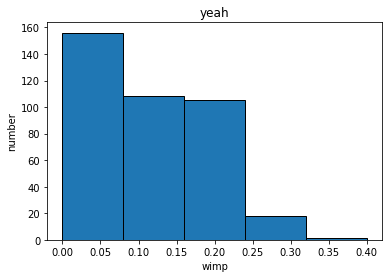

In [333]:
plt.figure()
plt.title('yeah')
plt.hist(data_yeah.wimp, 5, edgecolor='black')
plt.xlabel('wimp')
plt.ylabel('number')
plt.show()

## Data standardisation

In [380]:
import sklearn as sk
from sklearn import preprocessing

In [374]:
print(sklearn.__version__)

0.21.2


In [377]:
# this is to select a df

data_nan[['wimp']]

,wimp
0,0.0
1,0.0
2,0.2
3,0.0
4,0.1
5,0.4
6,0.0
7,0.5
8,0.0
9,0.3


In [381]:
for feature in data_nan.columns[1:12]:
    data_nan[[feature]] = preprocessing.scale(data_nan[[feature]])
data_nan.head()

,rowLabel,maxf0,minf0,excursion_size,meanf0,finalf0,mean_intensity,duration,max_velocity,final_velocity,maxf0_loc_ms,maxf0_loc_ratio,wimp
0,okay,-0.650463,-0.936330,0.458180,-0.873674,-0.952015,0.067379,1.414375,-0.546548,0.195746,-0.551699,-0.936823,0.0
1,uh,-0.898990,-0.943432,-0.299829,-1.034257,-0.954110,-0.222691,-0.208562,0.827837,1.191893,0.818717,1.333183,0.0
2,first,-0.095049,-0.775075,1.386980,-0.010607,-0.212131,0.759370,1.445586,0.830686,-0.455519,1.172292,0.189934,0.2
3,um,-0.435578,-0.605142,0.259895,-0.624437,-0.627816,0.615253,1.522051,-0.318280,0.144460,-0.923737,-1.183064,0.0
4,i,-0.537824,-0.394024,-0.416700,-0.530714,-0.464780,0.044613,-0.853055,0.592330,0.581444,0.000952,1.333183,0.1


In [383]:
data_nan.to_csv('../data/pfs_wimps_NaN_standarisaiton.csv')

# Data summary

In [316]:
data = pd.read_csv("../data/pfs_wimps_float64.csv")

In [264]:
data.head()

,rowLabel,maxf0,minf0,excursion_size,meanf0,finalf0,mean_intensity,duration,max_velocity,final_velocity,maxf0_loc_ms,maxf0_loc_ratio,wimp
0,okay,122.699389,90.780426,5.216099,103.083299,91.706489,60.149844,480.00,-41.226733,6.073829,46.972989,0.097860,0.0
1,uh,100.410428,90.356305,1.826543,91.828157,91.554214,57.829029,220.00,50.256391,37.407694,220.000000,1.000000,0.0
2,first,172.511288,100.410428,9.369380,163.575022,145.482690,65.686393,485.00,50.446048,-14.411732,264.641866,0.545653,0.2
3,um,141.971196,110.558641,4.329438,120.552135,115.269896,64.533326,497.25,-26.032538,4.460641,0.000000,0.000000,0.0
4,i,132.801350,123.166390,1.303934,127.121156,127.119726,59.967700,116.75,34.580378,18.205977,116.750000,1.000000,0.1


In [263]:
# summary of all data

data.describe()

,maxf0,minf0,excursion_size,meanf0,finalf0,mean_intensity,duration,max_velocity,final_velocity,maxf0_loc_ms,maxf0_loc_ratio,wimp
count,24994.000000,24994.000000,24994.000000,24994.000000,24994.000000,24994.000000,24994.000000,24994.000000,24994.000000,24994.000000,24994.000000,24994.000000
mean,181.035705,146.697075,3.167275,138.376219,160.900818,59.610755,253.412304,-4.846861,-0.083363,116.629823,0.470170,0.285314
std,89.686090,59.720146,4.471749,87.903510,72.683422,8.001049,160.206560,66.564279,31.455682,126.261257,0.397425,0.264039
min,67.413644,48.712694,0.000000,0.000000,67.377162,24.687570,3.750000,-585.981025,-524.307227,0.000000,0.000000,0.000000
25%,118.368873,105.353943,0.750457,101.589581,110.523058,54.278918,130.000000,-23.237343,-6.728765,0.000000,0.000000,0.100000
50%,158.772170,126.854378,1.699977,129.259285,139.870568,59.694193,217.312500,-5.222959,0.400139,89.697774,0.414293,0.200000
75%,213.070057,177.637816,3.483809,186.320759,191.080176,65.024103,336.250000,14.470126,6.284246,170.000000,1.000000,0.400000
max,621.892277,586.972634,42.035143,622.992212,629.944729,85.602807,2486.375000,506.098939,497.099197,1353.198303,1.000000,1.000000


* excursion size (semitones) -- difference between maximum F0 in semitones and minimum F0

In [314]:
data_nan = pd.read_csv('../data/pfs_wimps_NaN_float64.csv')
data_nan.describe()

,maxf0,minf0,excursion_size,meanf0,finalf0,mean_intensity,duration,max_velocity,final_velocity,maxf0_loc_ms,maxf0_loc_ratio,wimp
count,24994.000000,24994.000000,24994.000000,21048.000000,24994.000000,24994.000000,24994.000000,24994.000000,24994.000000,24994.000000,24994.000000,24994.000000
mean,181.035705,146.697075,3.167275,164.318473,160.900818,59.610755,253.412304,-4.846861,-0.083363,116.629823,0.470170,0.285314
std,89.686090,59.720146,4.471749,70.090912,72.683422,8.001049,160.206560,66.564279,31.455682,126.261257,0.397425,0.264039
min,67.413644,48.712694,0.000000,67.225015,67.377162,24.687570,3.750000,-585.981025,-524.307227,0.000000,0.000000,0.000000
25%,118.368873,105.353943,0.750457,113.672112,110.523058,54.278918,130.000000,-23.237343,-6.728765,0.000000,0.000000,0.100000
50%,158.772170,126.854378,1.699977,147.122261,139.870568,59.694193,217.312500,-5.222959,0.400139,89.697774,0.414293,0.200000
75%,213.070057,177.637816,3.483809,196.417708,191.080176,65.024103,336.250000,14.470126,6.284246,170.000000,1.000000,0.400000
max,621.892277,586.972634,42.035143,622.992212,629.944729,85.602807,2486.375000,506.098939,497.099197,1353.198303,1.000000,1.000000


## Histogram

Histograms helps to understand the distribution of the numeric value that is not easy to see with the mean and median.

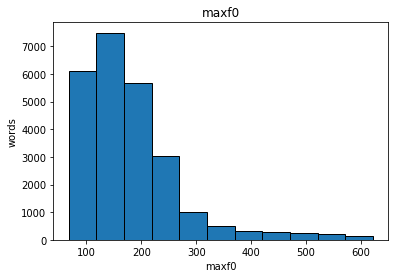

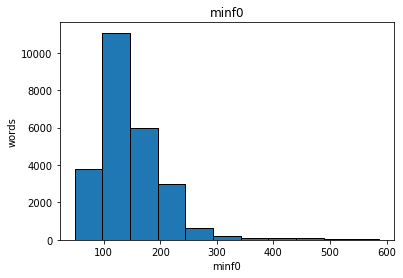

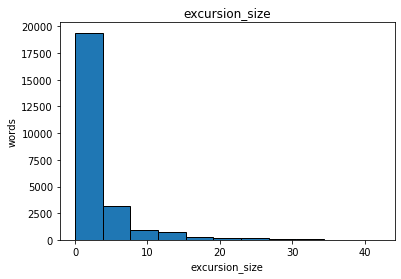

/Users/the-imitation-gamer/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/the-imitation-gamer/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


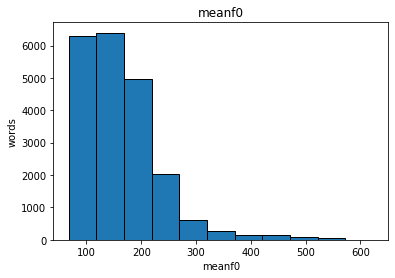

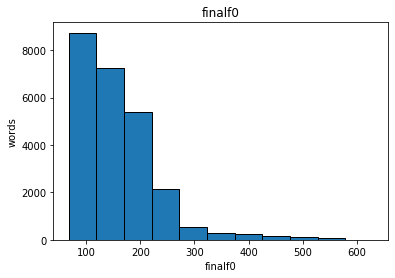

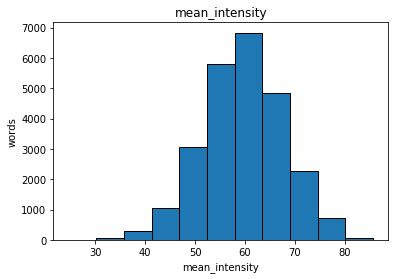

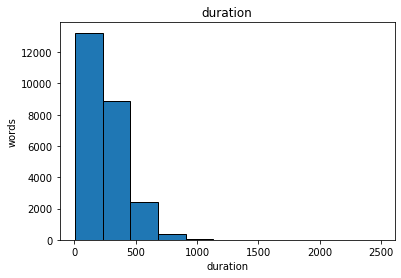

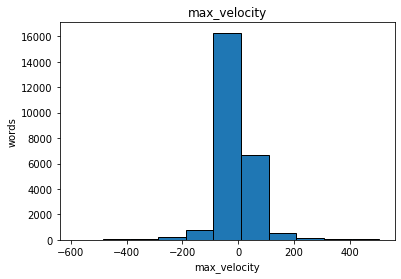

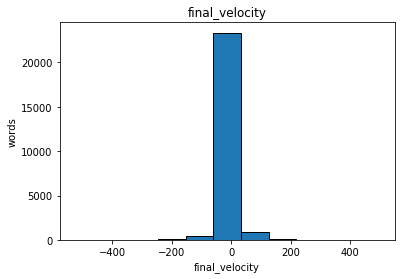

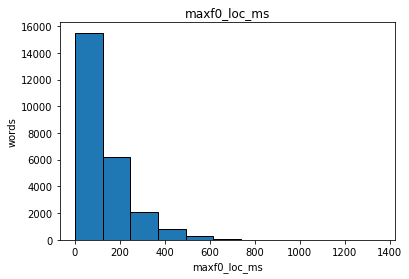

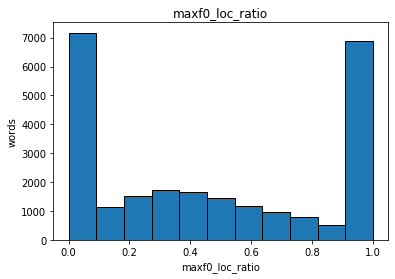

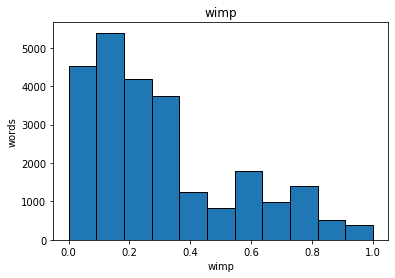

In [334]:
for feature in data_nan.columns[1:13]:
    plt.figure()
    plt.title(feature)
    plt.hist(data_nan[feature], 11, edgecolor='black')
    plt.xlabel(feature)
    plt.ylabel('words')
    plt.show()
#     plt.savefig('../result/stats/'+feature+".jpg", dpi=200)

In [320]:
data_nan.wimp.describe()

count    24994.000000
mean         0.285314
std          0.264039
min          0.000000
25%          0.100000
50%          0.200000
75%          0.400000
max          1.000000
Name: wimp, dtype: float64

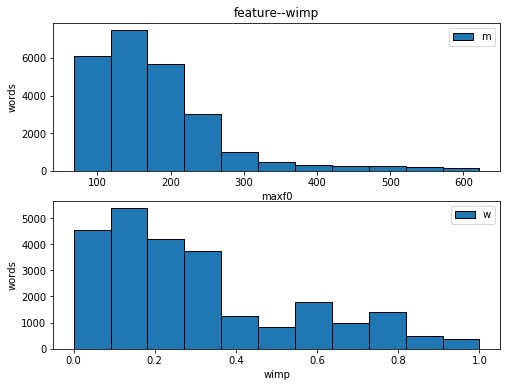

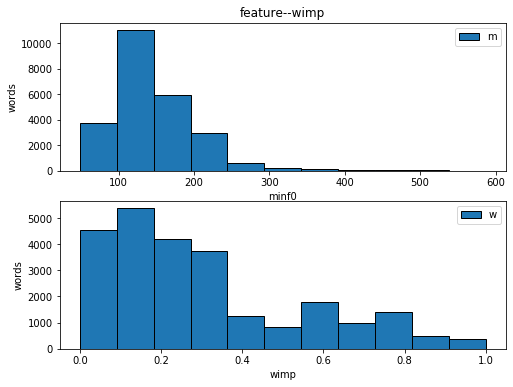

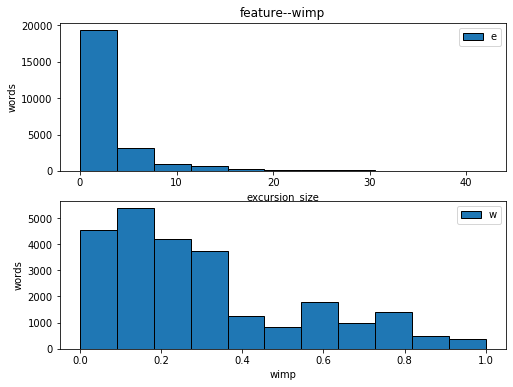

/Users/the-imitation-gamer/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/the-imitation-gamer/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


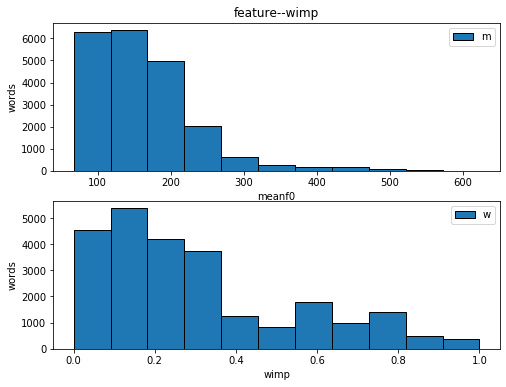

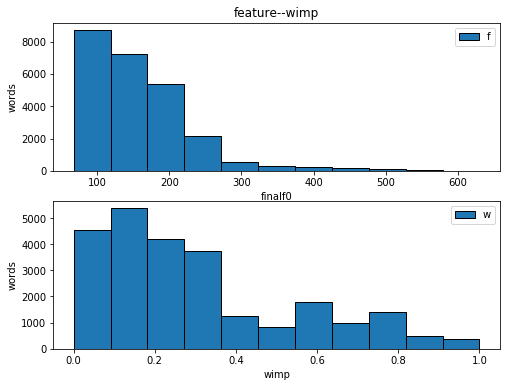

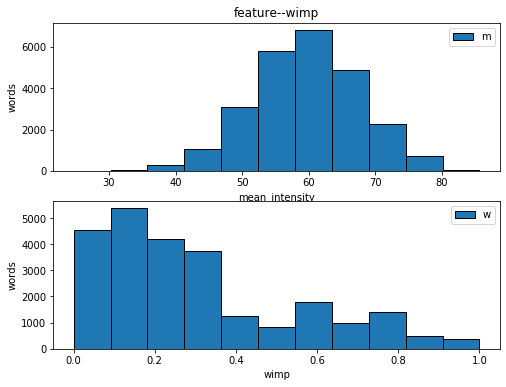

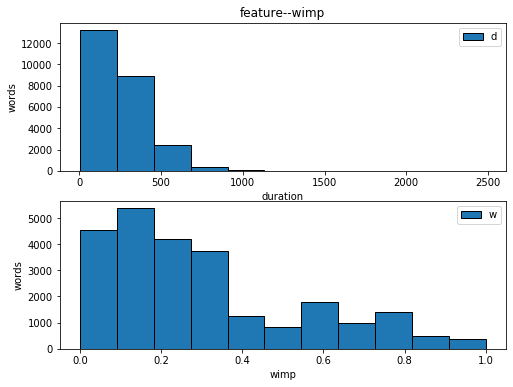

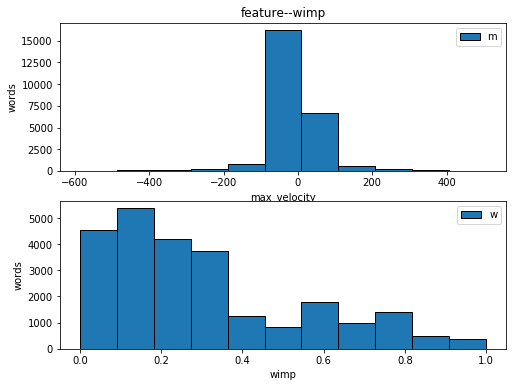

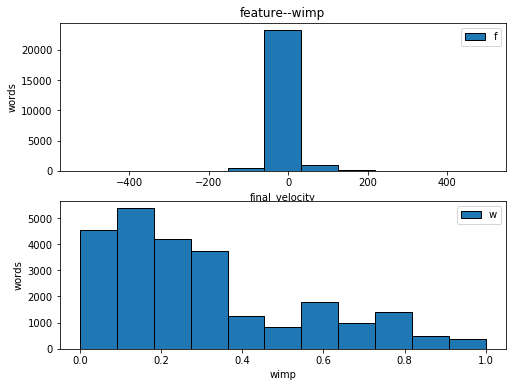

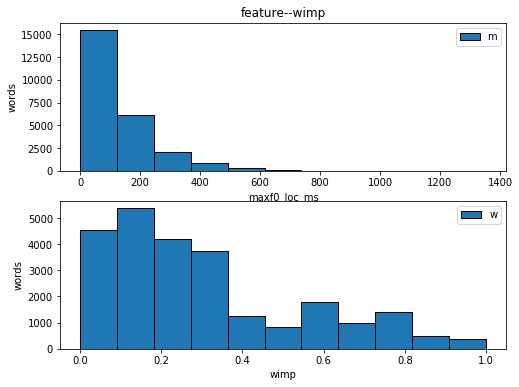

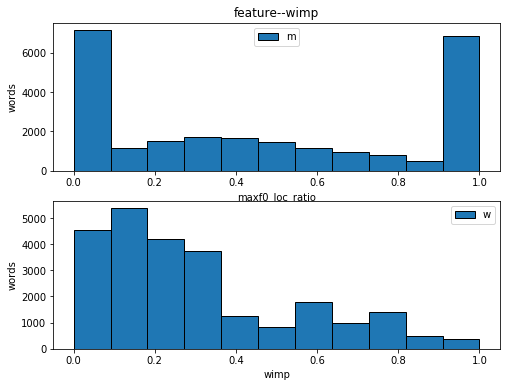

In [364]:
for feature in data_nan.columns[1:12]:
    plt.figure(figsize=(8,6))

    # params (row_num, col_num, index)
    plt.subplot(2, 1, 1)
    plt.title("feature--wimp")
    
    # params (data, bin, edgecolor)
    plt.hist(data_nan[feature], 11, density= False,edgecolor='black')
    
    plt.xlabel(feature)
    plt.ylabel("words")
    plt.legend(feature)
    
    plt.subplot(2, 1, 2)
    plt.hist(data_nan['wimp'], 11, density= False, edgecolor='black')
    plt.xlabel('wimp')
    plt.ylabel("words")
    plt.legend("wimp")
    
    plt.show()
#     plt.savefig('../result/stats/'+feature+"_wimp_hist_.jpg", dpi=200)

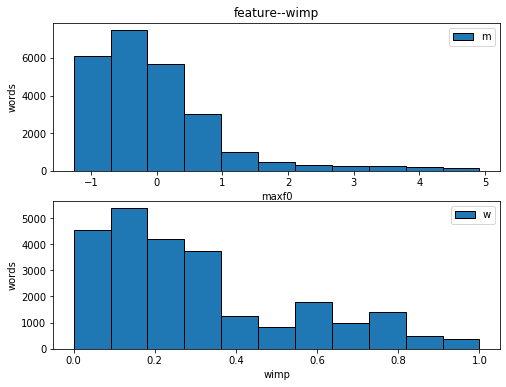

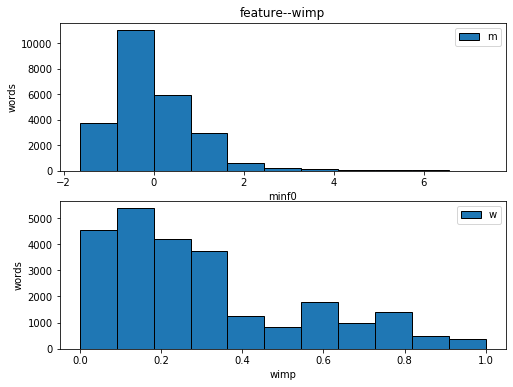

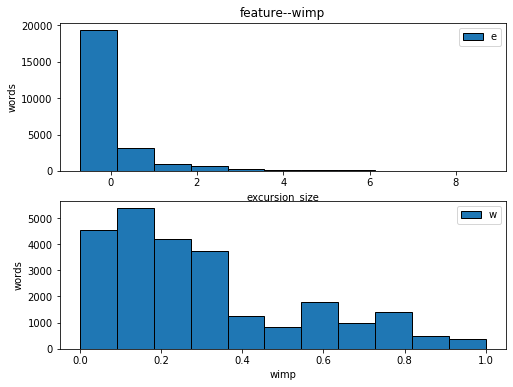

/Users/the-imitation-gamer/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/the-imitation-gamer/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


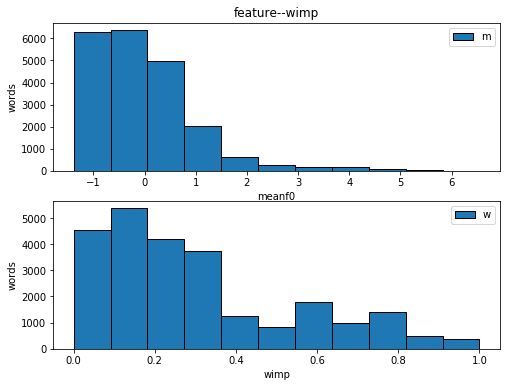

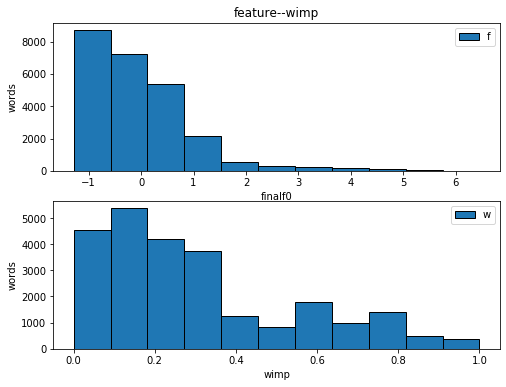

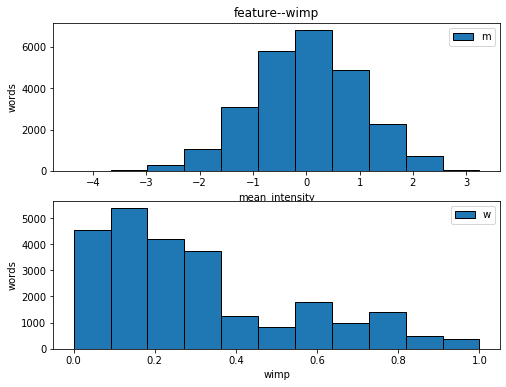

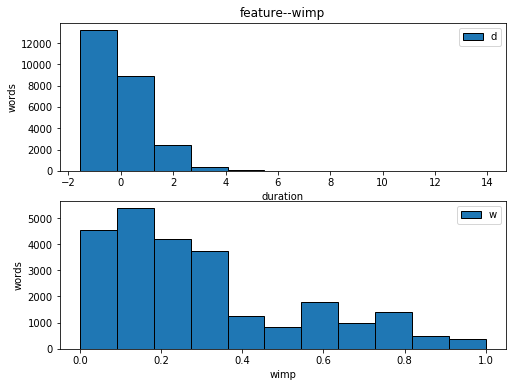

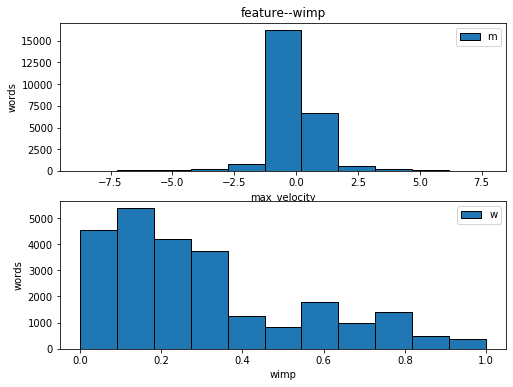

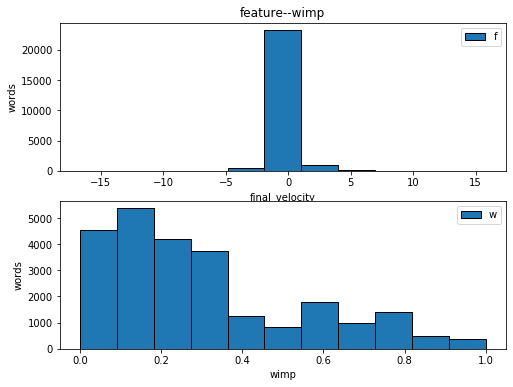

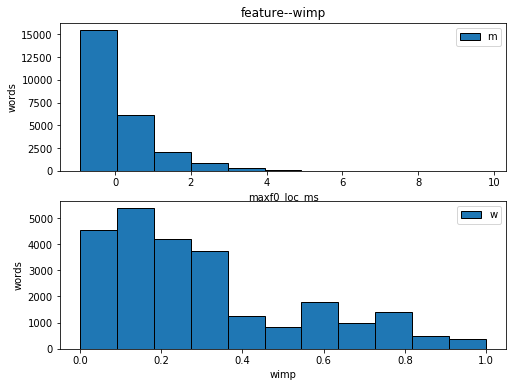

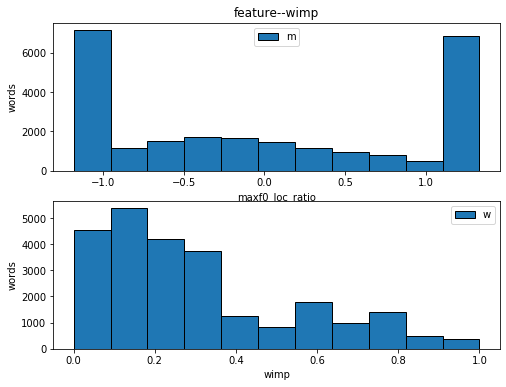

In [382]:
for feature in data_nan.columns[1:12]:
    plt.figure(figsize=(8,6))

    # params (row_num, col_num, index)
    plt.subplot(2, 1, 1)
    plt.title("feature--wimp")
    
    # params (data, bin, edgecolor)
    plt.hist(data_nan[feature], 11, density= False,edgecolor='black')
    
    plt.xlabel(feature)
    plt.ylabel("words")
    plt.legend(feature)
    
    plt.subplot(2, 1, 2)
    plt.hist(data_nan['wimp'], 11, density= False, edgecolor='black')
    plt.xlabel('wimp')
    plt.ylabel("words")
    plt.legend("wimp")
    
    plt.show()

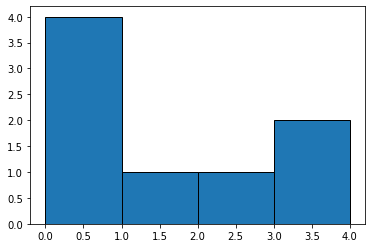

In [360]:
# test binning
data_test_bin = pd.Series([0, 0, 0, 0, 1, 2, 3, 4])
plt.figure()
bins = [0, 1, 2, 3, 4]
plt.hist(data_test_bin, bins, edgecolor='black')
plt.show()

# Binning range: [0, 1), [1, 2), [2, 3), [3, 4]
# Binning number: the number of intervals

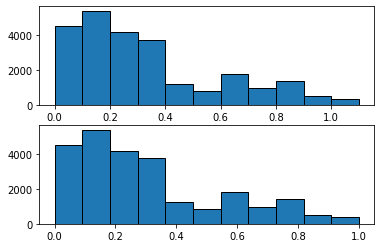

In [362]:
# clear range vs bin number, the same
bins = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1]
plt.figure()
plt.subplot(2,1,1)
plt.hist(data_nan['wimp'], bins, density= False, edgecolor='black')
plt.subplot(212)
plt.hist(data_nan['wimp'], 11, density= False, edgecolor='black')
plt.show()

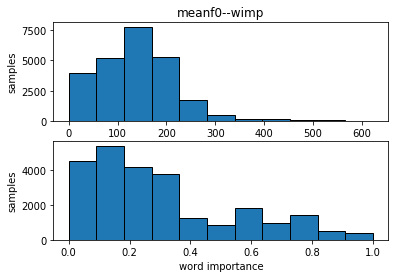

In [15]:
# params (row_num, col_num, index)
plt.subplot(2, 1, 1)
plt.title("meanf0--wimp")

# params (data, bin, edgecolor)
plt.hist(data.meanf0, 11, edgecolor='black')

plt.xlabel("meanf0(Hz)")
plt.ylabel("samples")

plt.subplot(2, 1, 2)
plt.hist(data.wimp, 11, edgecolor='black')
plt.xlabel("word importance")
plt.ylabel("samples")
plt.show()

1. x axis sub-range
2. normalise x axis
3. density

## Sampling

In [365]:
data_sample = data_nan.sample(frac=0.2, random_state=1)

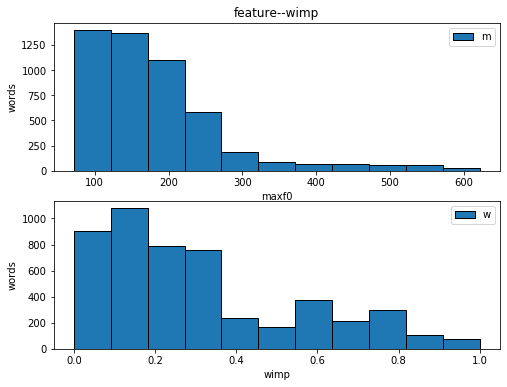

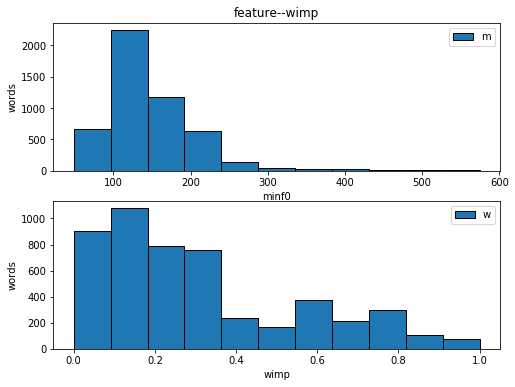

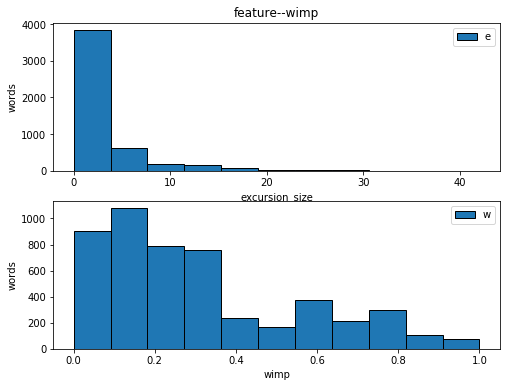

/Users/the-imitation-gamer/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/the-imitation-gamer/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


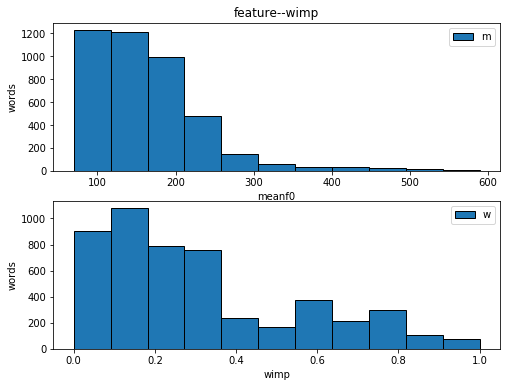

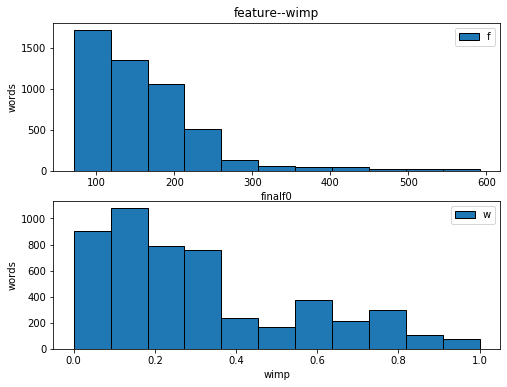

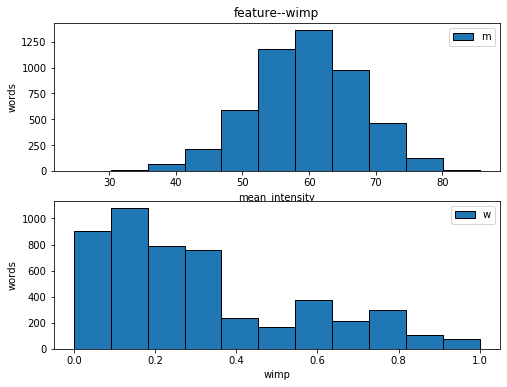

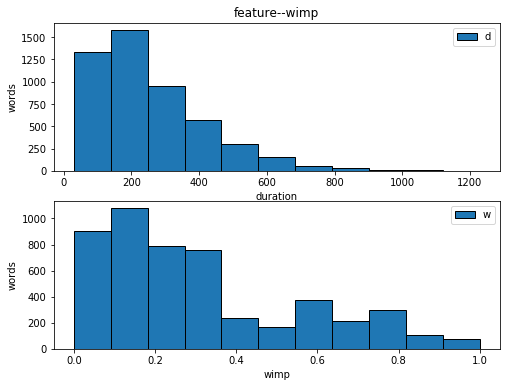

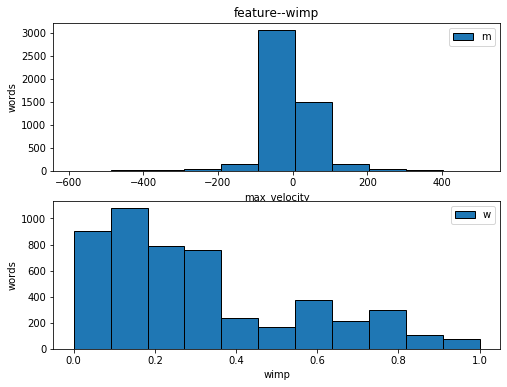

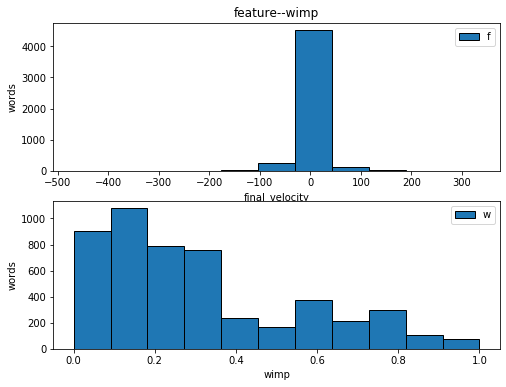

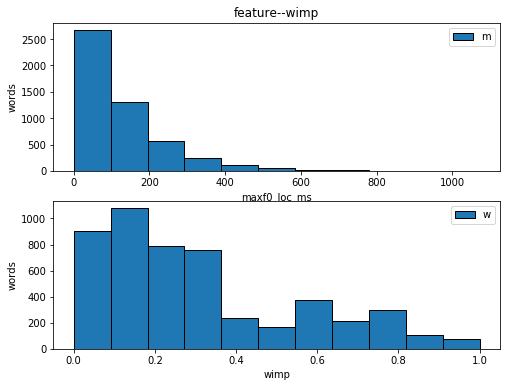

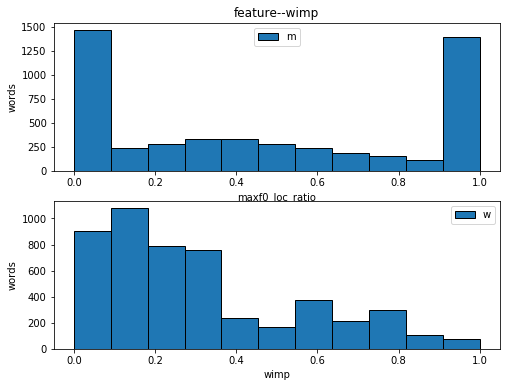

In [366]:
for feature in data_sample.columns[1:12]:
    plt.figure(figsize=(8,6))

    # params (row_num, col_num, index)
    plt.subplot(2, 1, 1)
    plt.title("feature--wimp")
    
    # params (data, bin, edgecolor)
    plt.hist(data_sample[feature], 11, density= False,edgecolor='black')
    
    plt.xlabel(feature)
    plt.ylabel("words")
    plt.legend(feature)
    
    plt.subplot(2, 1, 2)
    plt.hist(data_sample['wimp'], 11, density= False, edgecolor='black')
    plt.xlabel('wimp')
    plt.ylabel("words")
    plt.legend("wimp")
    
    plt.show()

finished data cleaning

# Building Language Models

## Word predictability

## Reading files

In [548]:
# pd failed to help extract sentences from the text file

sents = pd.read_csv('/Users/the-imitation-gamer/Documents/SLP/Msc_Dissertation/data/sw2005B.means', sep='\s+', engine='python')
sents.index = sents["rowLabel"]
sents.drop('rowLabel', axis=1, inplace=True)
sents.drop(['[silence]'], inplace=True)
index = list(sents.index)
index2 = re.findall('([A-Za-z\'\-\[\]]+)\s', test_str)
for item in index:
    if item not in index2:
        print(item)
# type(index)
# print(len(re.findall('([A-Za-z\'\-\[\]]+)\s', test_str)))

them_1


In [429]:
import re

In [490]:
with open('../switchboard_word_alignments/swb_ms98_transcriptions/20/2005/sw2005B-ms98-a-trans.text') as f:
    corpus = f.readlines()
#     print(f.readlines())
corpus

['sw2005B-ms98-a-0001 0.000000 10.442500 [silence]\n',
 "sw2005B-ms98-a-0002 10.442500 21.679000 well of course it's you know it's it one of the last few things in the world you'd ever want to do you know unless it's just you know really you know f[or]- and for their uh you know for their own good\n",
 "sw2005B-ms98-a-0003 21.679000 32.549000 i'd be very very careful and uh you know checking them out uh our had t[o]- place my mother in a nursing home she had a rather massive stroke about uh\n",
 'sw2005B-ms98-a-0004 32.549000 35.494750 uh s[ix]- eight months ago i guess\n',
 'sw2005B-ms98-a-0005 35.494750 38.470250 and uh we were i was fortunate in that\n',
 'sw2005B-ms98-a-0006 38.470250 45.258625 i was personally acquainted with the uh people who uh ran the nursing home in our little hometown\n',
 "sw2005B-ms98-a-0007 45.258625 56.448000 so i was very comfortable you know in doing it when it got to the point that we had to do it but there's well i had an occasion for my uh mother-in-

In [494]:
corpus[0]

'sw2005B-ms98-a-0001 0.000000 10.442500 [silence]\n'

In [472]:
# try to match the whole line

re.findall(r'\w+\d+\w+\d+\w+\d+ \d+.\d+ \d+.\d+ \w+', corpus[0])

[]

In [475]:
re.findall('\w+\s', corpus[0])

# '-', ' ', '.', '[', ']' are not included in '\w'

['0001 ', '000000 ', '442500 ']

In [478]:
corpus[1]

"sw2005B-ms98-a-0002 10.442500 21.679000 well of course it's you know it's it one of the last few things in the world you'd ever want to do you know unless it's just you know really you know f[or]- and for their uh you know for their own good\n"

In [549]:
# re.findall("[A-Za-z']+\s", corpus[1])
num =0
sent_list = []
for sent in corpus:
    sent = re.findall('([A-Za-z\'\-\_\[\]]+)\s', sent)
    if '[silence]' in sent:
        sent.remove('[silence]')
    print(sent)
    num += len(sent)
num
    

# how to deal with word like 'it's? above 2 ways

[]
['well', 'of', 'course', "it's", 'you', 'know', "it's", 'it', 'one', 'of', 'the', 'last', 'few', 'things', 'in', 'the', 'world', "you'd", 'ever', 'want', 'to', 'do', 'you', 'know', 'unless', "it's", 'just', 'you', 'know', 'really', 'you', 'know', 'f[or]-', 'and', 'for', 'their', 'uh', 'you', 'know', 'for', 'their', 'own', 'good']
["i'd", 'be', 'very', 'very', 'careful', 'and', 'uh', 'you', 'know', 'checking', 'them', 'out', 'uh', 'our', 'had', 't[o]-', 'place', 'my', 'mother', 'in', 'a', 'nursing', 'home', 'she', 'had', 'a', 'rather', 'massive', 'stroke', 'about', 'uh']
['uh', 's[ix]-', 'eight', 'months', 'ago', 'i', 'guess']
['and', 'uh', 'we', 'were', 'i', 'was', 'fortunate', 'in', 'that']
['i', 'was', 'personally', 'acquainted', 'with', 'the', 'uh', 'people', 'who', 'uh', 'ran', 'the', 'nursing', 'home', 'in', 'our', 'little', 'hometown']
['so', 'i', 'was', 'very', 'comfortable', 'you', 'know', 'in', 'doing', 'it', 'when', 'it', 'got', 'to', 'the', 'point', 'that', 'we', 'had', '

664

In [485]:
re.search('[A-Za-z]+\s.*', corpus[1], flags = re.DOTALL).group()

"well of course it's you know it's it one of the last few things in the world you'd ever want to do you know unless it's just you know really you know f[or]- and for their uh you know for their own good\n"

In [487]:
re.findall('[A-Za-z]+\s.*', corpus[1])

["well of course it's you know it's it one of the last few things in the world you'd ever want to do you know unless it's just you know really you know f[or]- and for their uh you know for their own good"]

In [488]:
sents = []
for sent in corpus:
    sent = re.findall('[A-Za-z]+\s.*', sent)
    sents.append(sent)
print(sents)

[[], ["well of course it's you know it's it one of the last few things in the world you'd ever want to do you know unless it's just you know really you know f[or]- and for their uh you know for their own good"], ['d be very very careful and uh you know checking them out uh our had t[o]- place my mother in a nursing home she had a rather massive stroke about uh'], ['uh s[ix]- eight months ago i guess'], ['and uh we were i was fortunate in that'], ['i was personally acquainted with the uh people who uh ran the nursing home in our little hometown'], ["so i was very comfortable you know in doing it when it got to the point that we had to do it but there's well i had an occasion for my uh mother-in-law who"], ['had fell and needed to be you know could not take care of herself anymore was confined to a nursing home for a while that was really not a very good experience uh'], ["it had to be done in a hurry i mean we didn't have you know like six months to check all of these places out"], ['an

## Creating corpus

In [440]:
from sklearn.feature_extraction.text import CountVectorizer

In [441]:
# term-document matrix

vectorizer = CountVectorizer()
bag_of_words = vectorizer.fit_transform(corpus)
bag_of_words

<124x604 sparse matrix of type '<class 'numpy.int64'>'
	with 1481 stored elements in Compressed Sparse Row format>

In [442]:
# (doc_index, term_index, term_freq)

print(bag_of_words)

  (0, 549)	1
  (0, 495)	1
  (0, 1)	1
  (0, 0)	1
  (0, 141)	1
  (0, 262)	1
  (0, 537)	1
  (1, 549)	1
  (1, 495)	1
  (1, 141)	1
  (1, 262)	1
  (1, 2)	1
  (1, 179)	1
  (1, 324)	1
  (1, 589)	1
  (1, 504)	2
  (1, 417)	1
  (1, 472)	4
  (1, 602)	6
  (1, 476)	5
  (1, 509)	1
  (1, 554)	2
  (1, 477)	1
  (1, 441)	1
  (1, 562)	1
  :	:
  (122, 549)	1
  (122, 495)	1
  (122, 602)	1
  (122, 567)	1
  (122, 450)	1
  (122, 585)	1
  (122, 550)	1
  (122, 403)	1
  (122, 599)	1
  (122, 287)	1
  (122, 280)	1
  (122, 136)	1
  (122, 297)	1
  (122, 331)	1
  (122, 506)	1
  (122, 551)	1
  (122, 400)	2
  (123, 549)	1
  (123, 495)	1
  (123, 499)	1
  (123, 297)	1
  (123, 331)	1
  (123, 137)	1
  (123, 302)	1
  (123, 340)	1


In [443]:
vectorizer.vocabulary_

{'sw2005b': 549,
 'ms98': 495,
 '0001': 1,
 '000000': 0,
 '10': 141,
 '442500': 262,
 'silence': 537,
 '0002': 2,
 '21': 179,
 '679000': 324,
 'well': 589,
 'of': 504,
 'course': 417,
 'it': 472,
 'you': 602,
 'know': 476,
 'one': 509,
 'the': 554,
 'last': 477,
 'few': 441,
 'things': 562,
 'in': 469,
 'world': 597,
 'ever': 432,
 'want': 584,
 'to': 567,
 'do': 422,
 'unless': 579,
 'just': 475,
 'really': 526,
 'or': 511,
 'and': 380,
 'for': 443,
 'their': 555,
 'uh': 574,
 'own': 514,
 'good': 450,
 '0003': 4,
 '32': 221,
 '549000': 316,
 'be': 392,
 'very': 582,
 'careful': 404,
 'checking': 409,
 'them': 556,
 'out': 513,
 'our': 512,
 'had': 455,
 'place': 517,
 'my': 497,
 'mother': 494,
 'nursing': 502,
 'home': 462,
 'she': 535,
 'rather': 523,
 'massive': 487,
 'stroke': 547,
 'about': 368,
 '0004': 5,
 '35': 236,
 '494750': 300,
 'ix': 473,
 'eight': 427,
 'months': 493,
 'ago': 374,
 'guess': 454,
 '0005': 6,
 '38': 243,
 '470250': 273,
 'we': 587,
 'were': 590,
 'was': 5

In [458]:
import re

## Stemming

# Computing correlation

## Pearson Correlation Coefficient

measures the **linear relationship** between two datasets. 

Requirement: each dataset be **normally distributed**. 

Values: 
between -1 and +1 

- 0 implying no correlation. 
- Correlations of -1 or +1 imply an exact linear relationship. 
- Positive correlations imply that as x increases, so does y. 
- Negative correlations imply that as x increases, y decreases.

### Method 1: pearsonr() from scipy

Parameters:

 x : 1D array
 y : 1D array the same length as x

Returns:

 (Pearson's correlation coefficient,
  2-tailed p-value)

In [71]:
from scipy.stats.stats import pearsonr

#### Trail: Correlation: meanf0 -- wimp

In [196]:
meanf0 = data.meanf0
wimp = data.wimp

<function matplotlib.pyplot.show(*args, **kw)>

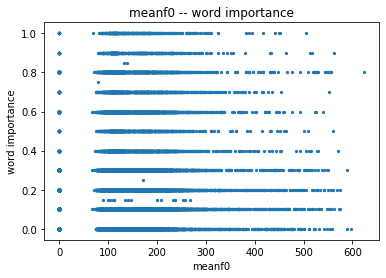

In [200]:
# scatter plot
plt.title("meanf0 -- word importance")
plt.scatter(meanf0, wimp, 5)
plt.xlabel('meanf0')
plt.ylabel('word importance')
plt.show()

In [201]:
# correlation

meanf0.corr(wimp)

0.11008355136163211

#### Trail:  all-feature-all-data 

In [153]:
# compute pearsonr on all pf-all data


for feature in pfs_wimps_df.columns:
    corr_p, p_value = pearsonr(pfs_wimps_df[feature].to_numpy(), pfs_wimps_df['wimp'].to_numpy())
    print("The Pearson Correlation Coefficient between {} and word importance is {}\n The p-value is {}" .format(feature, corr_p, p_value))
    

#### Trail: absolute value

In [156]:
# get the abs value the df due to some negative values in cols like "final_velocity"

pfs_wimps_df = pfs_wimps_df.abs()

In [157]:
pfs_wimps_df.to_csv('../data/pfs_wimps_abs.csv')

In [183]:
%%capture cap --no-stderr
for feature in pfs_wimps_df.columns:
    corr_p, p_value = pearsonr(pfs_wimps_df[feature].to_numpy(), pfs_wimps_df['wimp'].to_numpy())
    print("The Pearson Correlation Coefficient between {} and word importance is {}\n The p-value is {}\n" .format(feature, corr_p, p_value))

In [185]:
with open('../result/corr_p_all_24000_abs.txt', 'w') as f:
    f.write(cap.stdout)

In [186]:
del cap

In [187]:
# force clear all variables 

%reset -f

ERROR:root:Invalid alias: The name clear can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name more can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name less can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name man can't be aliased because it is another magic command.


In [190]:
data = pd.read_csv("../data/pfs_wimps_float64.csv")

In [ ]:
meanf0 = data.meanf0
wimp = data.wimp
plt.scatter(meanf0, wimp, 5)
plt.show()

In [198]:
duration = data.duration

<function matplotlib.pyplot.close(fig=None)>

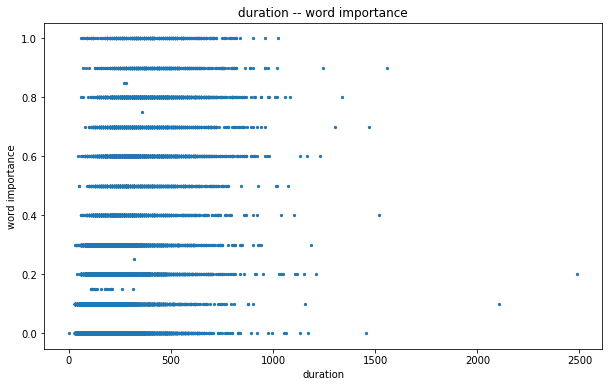

In [224]:
# scatter plot
plt.figure(1, figsize=(10, 6))
plt.title("duration -- word importance")
plt.scatter(data.duration, data.wimp, 5)
plt.xlabel('duration')
plt.ylabel('word importance')
plt.show()
plt.close

## Scatter plot

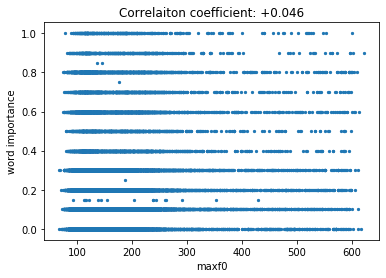

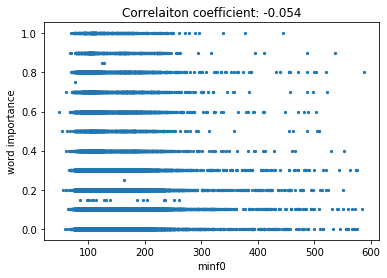

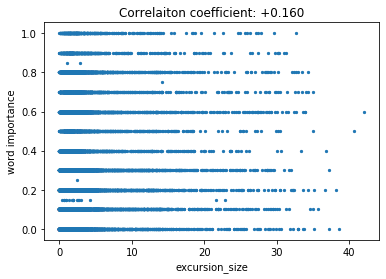

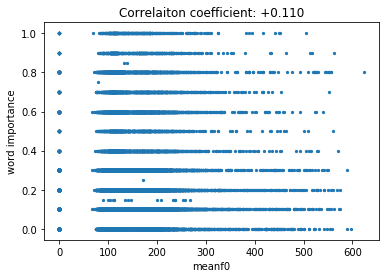

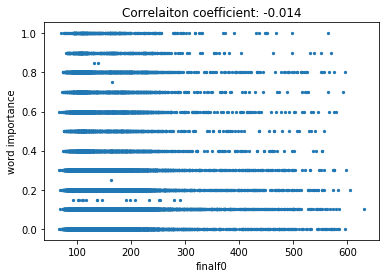

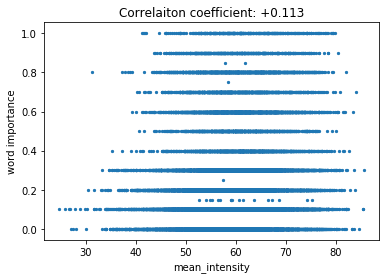

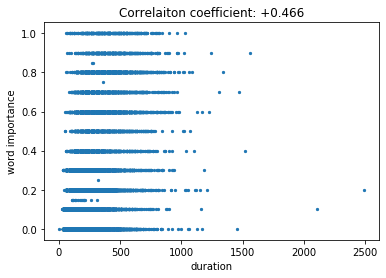

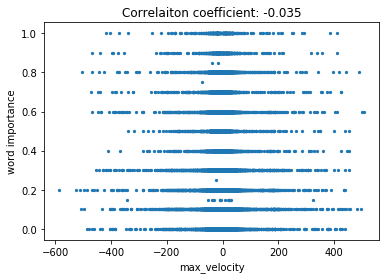

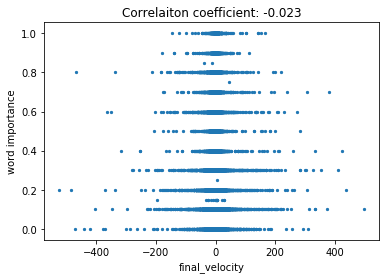

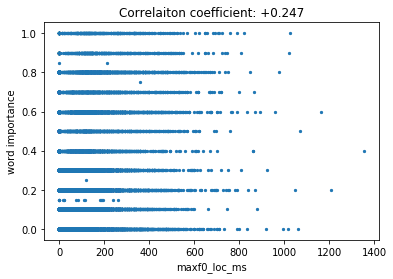

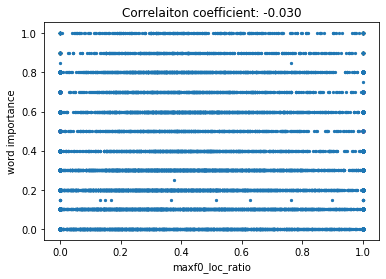

In [247]:
for feature in data.columns[1:12]:
    pf = data[feature]
    corr = pf.corr(wimp)
#     txt = 'Correlaiton coefficient: ' + "{:+.3f}".format(corr)
    plt.figure()
    plt.title('Correlaiton coefficient: ' + "{:+.3f}".format(corr))
    plt.scatter(pf, wimp, 5)
    plt.xlabel(feature)
    plt.ylabel('word importance')
#     plt.figtext(0.5, -0.1, txt, wrap=True, ha='center', fontsize=12)
#     plt.show()
    plt.savefig('../result/stats/'+feature+".jpg", dpi=200)

### Sampling

In [368]:
data_sample = data_nan.sample(n=1000, random_state=2)

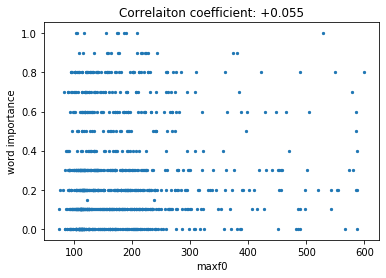

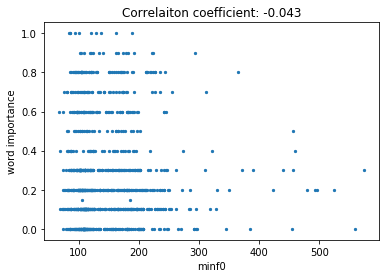

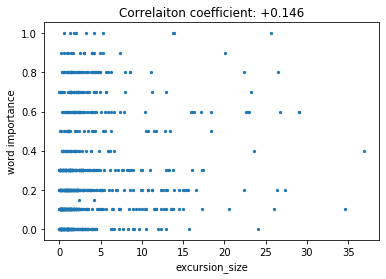

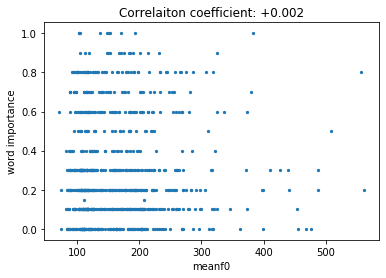

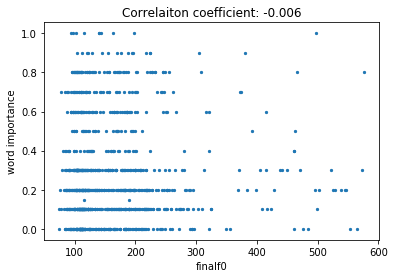

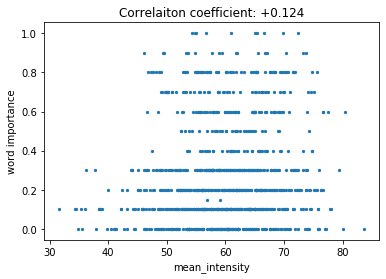

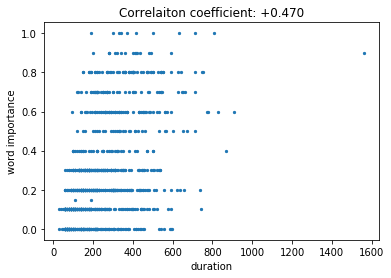

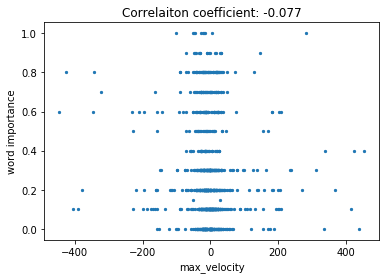

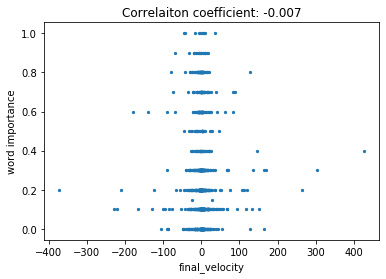

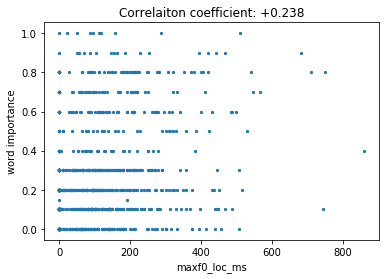

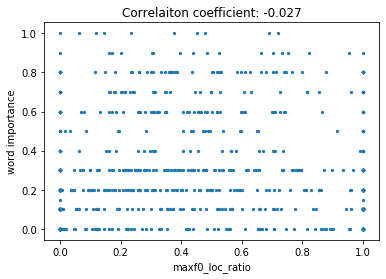

In [369]:
for feature in data_sample.columns[1:12]:
    pf = data_sample[feature]
    corr = pf.corr(data_sample['wimp'])
#     txt = 'Correlaiton coefficient: ' + "{:+.3f}".format(corr)
    plt.figure()
    plt.title('Correlaiton coefficient: ' + "{:+.3f}".format(corr))
    plt.scatter(pf, data_sample['wimp'], 5)
    plt.xlabel(feature)
    plt.ylabel('word importance')
#     plt.figtext(0.5, -0.1, txt, wrap=True, ha='center', fontsize=12)
    plt.show()
#     plt.savefig('../result/stats/'+feature+".jpg", dpi=200)

### Range: Insensity from 25 to 45

In [248]:
# seems that the regression line of mean_intensity from 25 to 45 looks good.

data.mean_intensity.describe()

count    24994.000000
mean        59.610755
std          8.001049
min         24.687570
25%         54.278918
50%         59.694193
75%         65.024103
max         85.602807
Name: mean_intensity, dtype: float64

In [256]:
mean_intensity_25to45 = data.query('25<= mean_intensity<45').mean_intensity

In [257]:
wimp_25to45 = data.query('25<= mean_intensity<45').wimp

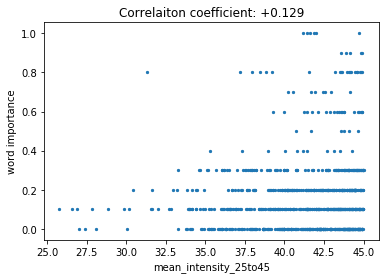

In [258]:
corr = mean_intensity_25to45.corr(wimp_25to45)
plt.figure()
plt.title('Correlaiton coefficient: ' + "{:+.3f}".format(corr))
plt.scatter(mean_intensity_25to45, wimp_25to45, 5)
plt.xlabel('mean_intensity_25to45')
plt.ylabel('word importance')
# plt.show()
plt.savefig('../result/stats/mean_intensity_25to45.jpg', dpi=200)

In [260]:
# can even do it this way 
data[(data.mean_intensity>= 25) & (data.mean_intensity<45)]

,rowLabel,maxf0,minf0,excursion_size,meanf0,finalf0,mean_intensity,duration,max_velocity,final_velocity,maxf0_loc_ms,maxf0_loc_ratio,wimp
6,to,146.022909,139.980932,0.731573,0.0,143.001921,41.104757,60.000,-12.544629,-12.277729,0.000,0.0,0.0
27,home,111.290089,111.088630,0.031367,0.0,111.272821,41.554003,350.000,0.089698,0.089549,350.000,1.0,0.8
29,yeah,102.930954,102.640306,0.048954,0.0,102.904248,41.394022,326.500,0.156224,0.154808,326.500,1.0,0.1
30,um-hum,111.609788,111.164691,0.069179,0.0,111.583082,43.978025,500.000,0.138624,0.138104,500.000,1.0,0.2
34,um-hum,126.849971,126.223090,0.085768,0.0,126.806387,44.311577,431.500,0.212352,0.211971,431.500,1.0,0.0
69,to,109.036776,107.067207,0.315578,0.0,107.608050,40.120059,109.250,-2.891097,-2.851329,0.000,0.0,0.1
84,uh,134.669892,133.726995,0.121639,0.0,134.477301,39.523196,146.875,0.839377,0.838874,146.875,1.0,0.0
92,that,110.930666,109.949561,0.153797,0.0,110.109090,37.213019,184.500,-0.868406,-0.865412,0.000,0.0,0.1
94,could,109.048220,108.211355,0.133372,0.0,108.370885,44.652676,157.375,-0.868558,-0.862493,0.000,0.0,0.2
101,sh[e]-,129.229928,122.642054,0.905837,0.0,128.511250,35.994440,275.000,3.342483,3.311940,275.000,1.0,0.1


### Feature combination (trail)

In [385]:
data = pd.read_csv('../data/pfs_wimps_NaN_standarisaiton.csv')
data.head()

,Unnamed: 0,rowLabel,maxf0,minf0,excursion_size,meanf0,finalf0,mean_intensity,duration,max_velocity,final_velocity,maxf0_loc_ms,maxf0_loc_ratio,wimp
0,0,okay,-0.650463,-0.936330,0.458180,-0.873674,-0.952015,0.067379,1.414375,-0.546548,0.195746,-0.551699,-0.936823,0.0
1,1,uh,-0.898990,-0.943432,-0.299829,-1.034257,-0.954110,-0.222691,-0.208562,0.827837,1.191893,0.818717,1.333183,0.0
2,2,first,-0.095049,-0.775075,1.386980,-0.010607,-0.212131,0.759370,1.445586,0.830686,-0.455519,1.172292,0.189934,0.2
3,3,um,-0.435578,-0.605142,0.259895,-0.624437,-0.627816,0.615253,1.522051,-0.318280,0.144460,-0.923737,-1.183064,0.0
4,4,i,-0.537824,-0.394024,-0.416700,-0.530714,-0.464780,0.044613,-0.853055,0.592330,0.581444,0.000952,1.333183,0.1


In [390]:
meanf0_dur= data.meanf0 + data.duration
meanf0_dur

0        0.540701
1       -1.242819
2        1.434979
3        0.897614
4       -1.383769
5       -0.838386
6             NaN
7        0.279874
8       -0.673088
9             NaN
10       0.099220
11      -1.063045
12            NaN
13      -0.341753
14       0.128986
15            NaN
16      -0.412910
17       0.748141
18       0.720270
19            NaN
20       0.919913
21       0.010076
22      -0.606321
23      -0.016555
24       0.038694
25            NaN
26            NaN
27            NaN
28       0.373886
29            NaN
           ...   
24964   -1.518005
24965   -0.527421
24966   -0.937790
24967    0.482023
24968   -1.707369
24969   -0.905170
24970   -1.388460
24971   -0.623489
24972   -0.796457
24973   -1.169489
24974   -0.978598
24975   -1.139143
24976   -0.965960
24977   -1.331804
24978   -1.861380
24979   -0.270189
24980   -1.604703
24981   -1.556500
24982         NaN
24983    0.680271
24984   -0.899525
24985   -1.067903
24986   -1.087806
24987         NaN
24988     

In [392]:
meanf0_dur.corr(data.wimp)

0.3173722577656492

In [393]:
data.duration.corr(data.wimp)

0.46649236709838493

In [394]:
data.meanf0.corr(data.wimp)

-0.002082990484813087

In [395]:
intensity_dur = data.mean_intensity + data.duration
intensity_dur

0        1.481754
1       -0.431253
2        2.204956
3        2.137304
4       -0.808442
5       -0.613031
6       -3.520285
7        0.899381
8       -0.157971
9       -1.026370
10       0.933761
11      -1.109910
12      -1.290157
13      -0.027113
14       0.735911
15      -0.354040
16       0.264837
17       1.002564
18       0.897105
19      -1.547166
20       1.031415
21      -0.247114
22      -0.146651
23      -0.388470
24       0.417089
25      -2.063856
26      -0.837895
27      -1.653936
28       0.630285
29      -1.820620
           ...   
24964   -0.535200
24965    0.971751
24966    0.226888
24967    2.078232
24968   -0.654622
24969   -0.014302
24970   -0.130425
24971    0.367110
24972    0.141636
24973   -0.756879
24974    0.158604
24975   -0.125304
24976   -0.533565
24977   -1.190323
24978   -1.458285
24979    1.154660
24980   -0.958361
24981   -1.141654
24982   -2.320435
24983    1.833597
24984   -0.424396
24985   -1.110073
24986   -1.127756
24987   -0.922400
24988   -0

In [396]:
intensity_dur.corr(data.wimp)

0.3987115449802634

In [397]:
data.mean_intensity.corr(data.wimp)

0.11254300094944764

In [398]:
data.duration.corr(data.wimp)

0.46649236709838493

In [399]:
intensity_dur_meanf0 = data.mean_intensity + data.duration + data.meanf0
intensity_dur_meanf0

0        0.608080
1       -1.465510
2        2.194349
3        1.512867
4       -1.339156
5       -0.882376
6             NaN
7        0.264245
8       -0.992340
9             NaN
10       0.755443
11      -1.296492
12            NaN
13      -0.459143
14      -0.013441
15            NaN
16      -0.480231
17       0.428399
18       0.055531
19            NaN
20       0.341888
21      -1.119278
22      -0.782389
23      -1.171006
24      -0.171311
25            NaN
26            NaN
27            NaN
28      -0.160523
29            NaN
           ...   
24964   -1.095595
24965    0.590471
24966   -0.190236
24967    1.582824
24968   -1.217120
24969   -0.211545
24970   -0.623696
24971    0.014603
24972   -0.258997
24973   -1.218441
24974   -0.361749
24975   -0.721935
24976   -1.092777
24977   -1.722130
24978   -2.112373
24979    0.593668
24980   -1.605455
24981   -1.802965
24982         NaN
24983    1.286755
24984   -0.928097
24985   -1.729875
24986   -1.637938
24987         NaN
24988     

In [400]:
intensity_dur_meanf0.corr(data.wimp)

0.279965270954384

In [401]:
f0loc_dur = data.maxf0_loc_ms + data.duration
f0loc_dur

0        0.862676
1        0.610155
2        2.617877
3        0.598314
4       -0.852103
5       -0.689132
6       -2.131029
7       -0.008727
8       -0.762456
9       -0.020068
10       1.312046
11      -1.800200
12      -1.249337
13      -0.833460
14      -0.045399
15       3.279751
16       0.421446
17       1.213611
18       1.130470
19      -0.018297
20       1.540709
21       3.085019
22      -0.518671
23       2.821246
24       0.783840
25      -1.514191
26       2.876125
27       2.451256
28       0.558508
29       2.118441
           ...   
24964   -1.089322
24965   -0.466131
24966   -0.822812
24967    0.976111
24968   -2.068608
24969   -0.805478
24970   -1.818926
24971   -0.433944
24972   -0.124821
24973   -1.631664
24974   -0.624859
24975   -1.392791
24976   -0.234305
24977   -1.723734
24978   -2.131029
24979    0.684738
24980   -1.618091
24981   -0.947699
24982   -1.655815
24983    1.166143
24984   -0.628393
24985   -1.371838
24986   -0.227191
24987    0.332220
24988    1

In [402]:
f0loc_dur.corr(data.wimp)

0.4080511701697926

In [141]:
# del
# compute cor-co for multiple files

# input: number of samples, feature_name_1, feature_name_2
# output: coefficient, plot

def correlation(num, feature1, feature2="wimp"):
    
    flat_pf = []
    for pf in pfs:
        for item in pf[:, feature_dict[feature]]:
            flat_pf.append(item)
    flat_pf = np.asarray(flat_pf, dtype=float)
    
    
    c_matrix = np.array([flat_pf[:num], flat_wimps[:num]])
    #print(c_matrix)
    
    corr_matrix = np.corrcoef(c_matrix.astype(float))
    print(corr_matrix)
    smg.plot_corr(corr_matrix, xnames=[feature], ynames=["wi"])
    plt.show()

array([103.08329929,  91.82815735, 163.57502188, 120.55213549,
       127.12115618, 145.44030691,   0.        , 119.80223325,
       105.83822436,   0.        , 151.82024514, 151.24109209,
         0.        , 134.03777446, 111.79698226,   0.        ,
       112.09724493, 124.07573077, 105.33316007,   0.        ,
       115.99001968, 103.18921655, 119.76010272, 109.47110636,
       123.07790455,   0.        ,   0.        ,   0.        ,
       108.89138627,   0.        ,   0.        , 116.38556539,
       120.28390825, 117.42550937,   0.        , 120.70828475,
       166.42466836, 118.59901226, 140.71313568, 127.57168329,
       120.83483069,   0.        , 120.36446012, 112.46837728,
         0.        ,   0.        , 118.52125104, 120.39297096,
       112.05027368,   0.        ,   0.        , 112.59381702,
         0.        , 110.48340893, 113.00127911, 107.39422976,
       112.46306271, 143.83020254, 133.68296658, 158.46774301,
       117.79114889, 113.24355628, 103.17445471, 114.68

## p-value

The p-value roughly indicates **the probability of an uncorrelated system** producing datasets that have a Pearson correlation at least as extreme as the one computed from these datasets. 

The p-values are **not entirely reliable** but are probably reasonable for datasets **larger than 500** or so.

now processing:  ../prosody_pro/test_sw2005A/duration
[[ 1.         -0.01155001]
 [-0.01155001  1.        ]]
now processing:  ../prosody_pro/test_sw2005A/excursionsize
[[1.         0.11720182]
 [0.11720182 1.        ]]
now processing:  ../prosody_pro/test_sw2005A/finalf0
[[ 1.         -0.02703742]
 [-0.02703742  1.        ]]
now processing:  ../prosody_pro/test_sw2005A/finalvelocity
[[1.00000000e+00 1.33448987e-04]
 [1.33448987e-04 1.00000000e+00]]
now processing:  ../prosody_pro/test_sw2005A/maxf0
[[1.         0.01577036]
 [0.01577036 1.        ]]
now processing:  ../prosody_pro/test_sw2005A/maxf0_loc_ms
[[ 1.         -0.04917057]
 [-0.04917057  1.        ]]
now processing:  ../prosody_pro/test_sw2005A/maxf0_loc_ratio
[[ 1.        -0.1514473]
 [-0.1514473  1.       ]]
now processing:  ../prosody_pro/test_sw2005A/maxvelocity
[[1.         0.04750583]
 [0.04750583 1.        ]]
now processing:  ../prosody_pro/test_sw2005A/meanf0
[[1.         0.36801756]
 [0.36801756 1.        ]]
now proce

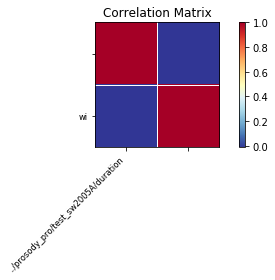

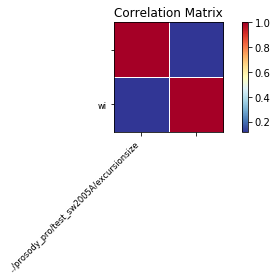

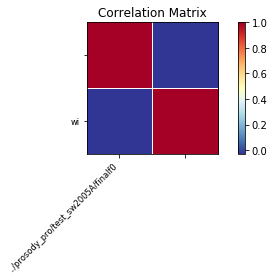

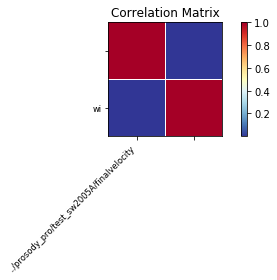

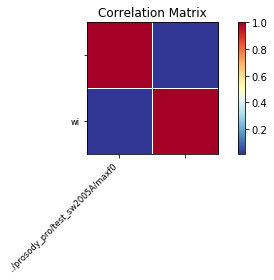

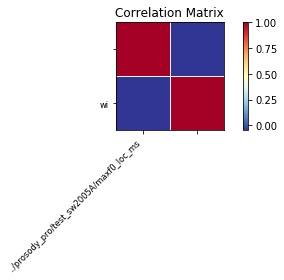

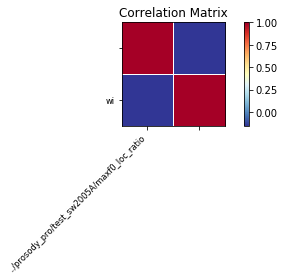

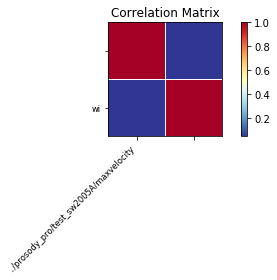

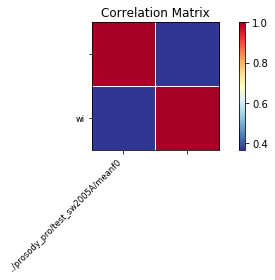

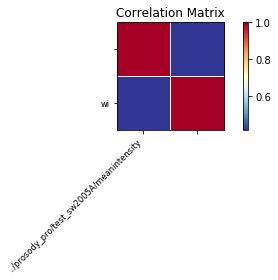

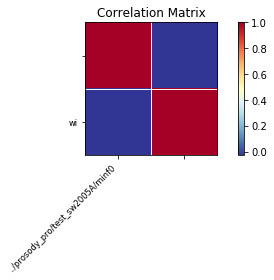

In [167]:
### del
### codes for reading data from .txt pf files


cor_path_list = sorted(glob.glob("../prosody_pro/test_sw2005A/*.txt"))

wi= pd.read_csv("/Users/the-imitation-gamer/Documents/SLP/Msc_Dissertation/wimp_corpus/annotations/20/2005/sw2005A-ms98-a-word.text", sep="\s+", header=None, engine="python")

#wi = np.loadtxt(fname = "/Users/the-imitation-gamer/Documents/SLP/Msc_Dissertation/wimp_corpus/annotations/20/2005/sw2005A-ms98-a-word.text")
wi.columns = ["ms_id", "start_time", "end_time", "imp"]
wi = wi.imp.to_numpy()

# try to replace 0 with a small value
#wi = np.where(wi == 0, 0.05, wi)
# print(wi)
# print(len(wi))



for i in range(len(cor_path_list)):
    pf_test=pd.read_csv(cor_path_list[i], sep='\t')
    print("now processing: ", os.path.splitext(cor_path_list[i])[0])
    # print(pf_test)
    pf_test=pf_test.to_numpy()
    # print(pf_test.shape)
    slope_test = pf_test[0][1:]
    slope_test = np.where(slope_test == "--undefined--", 0, slope_test)
    slope_test = np.absolute(slope_test)
    # print(slope_test)
    
    c_matrix = np.array([slope_test, wi])
    # cast c_matrix to float incase of the attribuet error of .cov()
    corr_matrix = np.corrcoef(c_matrix.astype(float))
    print(corr_matrix)
    smg.plot_corr(corr_matrix, xnames=[os.path.splitext(cor_path_list[i])[0]], ynames=["wi"])
    #plt.show()
    
    plt.savefig(os.path.splitext(cor_path_list[i])[0] + ".jpg")

In [57]:
# compute cor-co for multiple files

# input: number of samples, feature_name_1, feature_name_2
# output: coefficient, plot

def correlation(num, feature):
    
    flat_pf = []
    for pf in pfs:
        for item in pf[:, feature_dict[feature]]:
            flat_pf.append(item)
    flat_pf = np.asarray(flat_pf, dtype=float)
    
    
    c_matrix = np.array([flat_pf[:num], flat_wimps[:num]])
    #print(c_matrix)
    
    corr_matrix = np.corrcoef(c_matrix.astype(float))
    print(corr_matrix)
    smg.plot_corr(corr_matrix, xnames=[feature], ynames=["wi"])
    plt.show()

In [63]:
def correlation(num, feature):
    
    flat_pf = []
    for pf in pfs:
        for item in pf[:, feature_dict[feature]]:
            flat_pf.append(item)
    flat_pf = np.asarray(flat_pf, dtype=float) # c_matrix needs to be float
    
    
    c_matrix = np.array([flat_pf[:num], flat_wimps[:num]])
    
    
    corr_matrix = np.corrcoef(c_matrix)
    print(corr_matrix[0,1])
    smg.plot_corr(corr_matrix, xnames=[feature], ynames=["wi"])
    plt.show()

0.4117810929649494


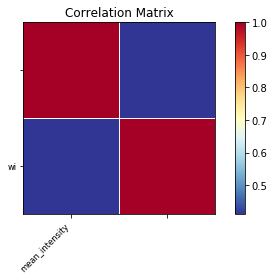

In [64]:
correlation(5000, "mean_intensity")

[[1.         0.41178109]
 [0.41178109 1.        ]]


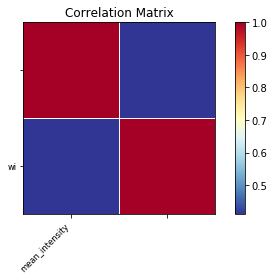

[[1.         0.37754034]
 [0.37754034 1.        ]]


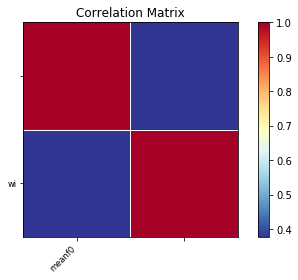

In [49]:
for i in feature_dict:
    print(feature_dict[i])


correlation(5000, "mean_intensity")
correlation(5000, "meanf0")

(33302,)
(33302,)
[[1.         0.40135501]
 [0.40135501 1.        ]]


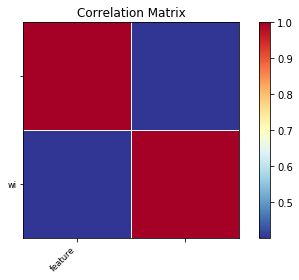

In [55]:
# test feature combination: meanf0 + mean intensity

flat_pf1 = []
for pf in pfs:
    for item in pf[:, feature_dict["mean_intensity"]]:
        flat_pf1.append(item)
flat_pf1 = np.asarray(flat_pf1, dtype=float)
print(flat_pf1.shape)

flat_pf2 = []
for pf in pfs:
    for item in pf[:, feature_dict["meanf0"]]:
        flat_pf2.append(item)
flat_pf2 = np.asarray(flat_pf2, dtype=float)
print(flat_pf2.shape)

flat_pf_add = np.add(flat_pf1, flat_pf2)

c_matrix = np.array([flat_pf_add[:5000], flat_wimps[:5000]])
#print(c_matrix)
    
corr_matrix = np.corrcoef(c_matrix.astype(float))
print(corr_matrix)
smg.plot_corr(corr_matrix, xnames=["feature"], ynames=["wi"])
plt.show()

In [77]:
test_l = [1.0, 2.0, "--no--"]
print(test_l)
# test_l.shape
for item in test_l:
    if isinstance(item, float):
        item = item
    else:
        item = 0
    print(item)
test_l = np.array(test_l)
print(test_l)

[1.0, 2.0, '--no--']
1.0
2.0
0
['1.0' '2.0' '--no--']


In [169]:
%%capture cap --no-stderr
print ('stuff no')
with open('../result/output.txt', 'w') as f:
    f.write(cap.stdout)

In [132]:
np.mean(np.delete(slope_test, "--undefined--")

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96
 97 98 99]
